<a href="https://colab.research.google.com/github/chegrincova/portfolio/blob/main/stazhirovka_chegrincova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Обзор файла и выявление проблем

## Импорт библиотек

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm

## Загрузка и чтение файла

In [ ]:
#загрузка файла с ПК
uploaded = files.upload()

Saving final_task.csv to final_task.csv


In [ ]:
#Чтение файла
df = pd.read_csv('final_task.csv')

## Обзор датасета

In [ ]:
df.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [ ]:
df.shape

(4500, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

## Выявленные проблемы:

1. Возможный "мусор" в названии товара. Необходимо проверить наличие дубликатов. Можно убрать информацию о мини-ПК и моноблоках, т.к. клиента она не интересует.
2. Наличие признаков, не представляющих ценности в рамках кейса ('feedbacks','seller', 'seller_rating', 'Операционная система', 'Гарантийный срок', 'Страна производства', 'Габариты товара', 'Габариты товара (с упаковкой)').
3. Часть названий столбцов на английском, часть на русском, что не удобно для восприятия.
4. Необходимо привести цену в тип int. Проверить товары с ценой меньше 10 000
5. В продажах много пустых значений, так же в продажах не указано точное число продаж, необходимо привести данные в удобный для работы вид.
6. Разбить колонку "Процессор" на две колонки "Тип процессора" и количество ядер
7. Разбить колонку "Оперативная память" на "Тип памяти" и "Объем памяти"
8. Разбить колонку "Жесткий диск" на "Объем накопителя HDD" и "Объем накопителя SSD"
9

#Чистка и предобработка

###Удаление дубликатов

In [ ]:
# Для начала проверим датафрейм на наличие полных дубликатов и избавимся от них
df.duplicated().sum()

490

In [ ]:
df.duplicated(subset='product_id').sum()

490

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(4010, 16)

### Предварительная обработка данных в колонке "Название товара"

In [ ]:
#Поищем моноблоки и удалим их из файла
df_mono = df[df['title'].str.contains('моно', case=False)]

In [ ]:
df_mono

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
307,57405914,моноблок PRITTEC Платформа моноблока Prittec H...,37580₽,Купили менее 5 раз,0 отзывов,ПопШоп,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '41 см', 'Ширина упаковки':..."
533,73058584,POS-моноблок MMB-2119 X4125 с MSR без подставки,38042₽,NaN,1 отзыв,smartkkt,4.2,"{'Процессор_тип': 'Gemini Lake Refresh J4125',...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': 'нет', 'Объем накопит...",не заполнено,Windows 10 (Trial version),1 год ( 12 месяцев ),Китай,"{'Ширина предмета': '38 см', 'Глубина предмета...","{'Длина упаковки': '26 см', 'Ширина упаковки':..."
819,92652759,POS моноблок сенсорный с плоским экраном,22910₽,Купили менее 5 раз,2 отзыва,STPOSKZ,4.3,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
869,97083040,POS система RS609 сенсорный моноблок,20250₽,Купили менее 5 раз,0 отзывов,STPOSKZ,4.3,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Windows,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
1114,102514749,POS-моноблок МойPOS MMB-2119 X 3160 без подставки,34334₽,Купили более 5 раз,0 отзывов,smartkkt,4.2,{'Процессор_тип': 'Встроенный intel J3160 - co...,"{'Тип оперативной памяти': 'DDR', 'Объем опера...","{'Объем накопителя HDD': '0', 'Объем накопител...",не заполнено,"Windows 7/8/10, Linux, Ubuntu",1 год,Китай,"{'Ширина предмета': '38 см', 'Глубина предмета...","{'Длина упаковки': '26 см', 'Ширина упаковки':..."
1551,133090876,Сенсорный моноблок POScenter POS100 / Windows...,53620₽,NaN,0 отзывов,РЕГИОН КАСС,4.4,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Windows 10 IoT Entry,12 месяцев,Китай,"{'Ширина предмета': '43 см', 'Глубина предмета...","{'Длина упаковки': '54 см', 'Ширина упаковки':..."
1822,139198856,Сенсорный моноблок POScenter POS400 без OC,58982₽,NaN,0 отзывов,РЕГИОН КАСС,4.4,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '46 см', 'Ширина упаковки':..."
1872,140320130,Сенсорный POS-моноблок МойPOS MMB-2119 X4125 с...,37381₽,NaN,0 отзывов,smartkkt,4.2,"{'Процессор_тип': 'Intel', 'Количество ядер пр...","{'Тип оперативной памяти': 'SODDIM', 'Объем оп...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,"windows7/8/10, Linux, Ubuntu",1 год,Китай,"{'Ширина предмета': '46 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
3426,149250848,Сенсорный моноблок AT709,26000₽,NaN,0 отзывов,AlmatyPOS,0.0,"{'Процессор_тип': 'Intel J1800 2,0 GHz quad co...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,1 год,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."


In [ ]:
df_mono.shape

(9, 16)

In [ ]:
df.drop(df_mono.index,inplace=True)

In [ ]:
#Ищем мини-ПК
df_mini = df[df['title'].str.contains('мини', case=False)]

In [ ]:
df_mini.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
79,29092367,"Компьютер Chuwi Herobox 8/256 Гб / Мини ПК, не...",20209₽,Купили более 10 раз,3 отзыва,Market-77.ru,4.3,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 600,Windows 10 Home,6 мес,Китай,"{'Ширина предмета': '18.7 см', 'Глубина предме...","{'Длина упаковки': '25 см', 'Ширина упаковки':..."
80,32021475,Мини-ПК (неттоп)/ Beelink GK mini/ 8Гб/256Гб/ ...,16005₽,Купили более 30 раз,5 отзывов,Market-77.ru,4.3,"{'Процессор_тип': 'Gemini Lake Refresh J4125',...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics 600,Windows 10 Home,6 мес.,Китай,"{'Ширина предмета': '11.5 см', 'Глубина предме...","{'Длина упаковки': '7 см', 'Ширина упаковки': ..."
109,41125833,Мини ПК 4k Beelink GK Mini 8/256 G,16350₽,Купили более 5 раз,4 отзыва,Innopax,4.1,{'Процессор_тип': 'Gemini Lake Refresh Process...,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,Windows,NaN,Китай,"{'Ширина предмета': '10.2 см', 'Глубина предме...","{'Длина упаковки': '13 см', 'Ширина упаковки':..."
126,45020130,Мини компьютер (ПК) Beelink GK mini 8/128 G J4125,13329₽,Купили более 5 раз,0 отзывов,Innopax,4.1,"{'Процессор_тип': 'Intel J4125', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Windows 10,NaN,Китай,"{'Ширина предмета': '10.2 см', 'Глубина предме...","{'Длина упаковки': '13 см', 'Ширина упаковки':..."
351,61680474,"Мини компьютер (бесшумный). No Windows, I3-610...",59440₽,NaN,0 отзывов,Бесшумный Компьютер,5.0,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics 530,отсутствует,1 год,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '15 см', 'Ширина упаковки':..."


In [ ]:
#посмотрим на количество найденных мини-ПК
df_mini.shape

(118, 16)

In [ ]:
#удалим мини-ПК из датафрейма
df.drop(df_mini.index, inplace = True)

In [ ]:
df.shape

(3883, 16)

In [ ]:
#Попробуем поискать mini и mono латиницей
df_min_mon = df[df['title'].str.contains('mini|mono', case=False)]

In [ ]:
df_min_mon

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
219,51216849,Игровой Компьютер Robotcomp Alligator Mini V2,30418₽,Купили более 10 раз,2 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon Vega 7,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '13 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
221,51225818,Игровой Компьютер Robotcomp Alligator Mini V1,29354₽,Купили более 20 раз,4 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon Vega 7,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '13 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
222,51236370,Игровой Компьютер Robotcomp Alligator Mini V3,34232₽,Купили более 20 раз,8 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon Vega 7,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '13 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
226,51262332,Игровой Компьютер Robotcomp Alligator Mini V1 ...,35086₽,Купили более 5 раз,3 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon Vega 7,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '13 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
308,57807940,Игровой Компьютер Robotcomp Alligator Mini V2 ...,35330₽,Купили менее 5 раз,3 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon Vega 7,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '13 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
309,57808804,Игровой Компьютер Robotcomp Alligator Mini V3 ...,39412₽,Купили более 20 раз,5 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon Vega 7,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '13 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
496,68196748,Неттоп Beelink GK mini 8/256Gb Win10,15155₽,Купили более 20 раз,3 отзыва,Droid-box.ru,4.2,"{'Процессор_тип': 'Gemini Lake Refresh J4125',...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics 600,Windows,6 мес,Китай,"{'Ширина предмета': '11 см', 'Глубина предмета...","{'Длина упаковки': '20 см', 'Ширина упаковки':..."
550,75041629,Асик Ebang Ebit E12 44 Th/s 2019 год Asic/ Min...,58500₽,NaN,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': '21.5 см', 'Глубина предме...","{'Длина упаковки': '19.9 см', 'Ширина упаковки..."
561,75171269,Асик Avalon 821 10.5-11.5 Th/s 2018 год Asic/ ...,9999₽,Купили менее 5 раз,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': '43 см', 'Глубина предмета...","{'Длина упаковки': '

In [ ]:
#Посмотрим какие отфильтровались уникальные значения и есть ли среди них моноблоки и мини-ПК
df_min_mon['title'].unique()

array(['Игровой Компьютер Robotcomp Alligator Mini V2',
       'Игровой Компьютер Robotcomp Alligator Mini V1',
       'Игровой Компьютер Robotcomp Alligator Mini V3',
       'Игровой Компьютер Robotcomp Alligator Mini V1 Plus',
       'Игровой Компьютер Robotcomp Alligator Mini V2 Plus',
       'Игровой Компьютер Robotcomp Alligator Mini V3 Plus',
       'Неттоп Beelink GK mini 8/256Gb Win10',
       'Асик Ebang Ebit E12 44 Th/s 2019 год Asic/ Miner/ Antminer/ Mining',
       'Асик Avalon 821 10.5-11.5 Th/s 2018 год Asic/ Miner/ Antminer/ Mining',
       'Асик Avalon 910 17-18.5 Th/s 2018 год Asic/ Miner/ Antminer/ Mining',
       'Компьютер MonoX CleanWoptiv1', 'Компьютер MonoX ПК',
       'Игровой компьютер MonoX CleanWoptiv2',
       'Игровой компьютер MonoX Starlinkbasev1',
       'Игровой Компьютер Robotcomp Alligator Mini Bluetooth V1 Plus',
       'Игровой Компьютер Robotcomp Alligator Mini Bluetooth V3 Plus',
       'Игровой Компьютер Robotcomp Alligator Mini Bluetooth V1',
  

In [ ]:
#Из этого списка на мини-ПК похож неттоп-мини. Поищем заодно неттопы
df_nettop = df[df['title'].str.contains('неттоп|nettop', case=False)]

In [ ]:
df_nettop

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
496,68196748,Неттоп Beelink GK mini 8/256Gb Win10,15155₽,Купили более 20 раз,3 отзыва,Droid-box.ru,4.2,"{'Процессор_тип': 'Gemini Lake Refresh J4125',...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics 600,Windows,6 мес,Китай,"{'Ширина предмета': '11 см', 'Глубина предмета...","{'Длина упаковки': '20 см', 'Ширина упаковки':..."
1486,125125463,Nettop IRU 110PGL Cel J4125/4Gb/SSD128Gb,17990₽,NaN,0 отзывов,Позитроника,4.4,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,12 мес.,Россия,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '14 см', 'Ширина упаковки':..."


In [ ]:
#удалим неттопы
df.drop([496, 1486], inplace=True)

In [ ]:
#также в список попали майнеры для криптовалюты, поищем их по всему датафрейму и удалим
df_miner = df[df['title'].str.contains('miner|майнер', case=False)]

In [ ]:
df_miner

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
550,75041629,Асик Ebang Ebit E12 44 Th/s 2019 год Asic/ Min...,58500₽,NaN,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': '21.5 см', 'Глубина предме...","{'Длина упаковки': '19.9 см', 'Ширина упаковки..."
551,75044322,Bitmain AntMiner S9i 14-14.5 Th/s,15000₽,Купили менее 5 раз,1 отзыв,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '13 см', 'Ширина упаковки':..."
561,75171269,Асик Avalon 821 10.5-11.5 Th/s 2018 год Asic/ ...,9999₽,Купили менее 5 раз,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': '43 см', 'Глубина предмета...","{'Длина упаковки': '20 см', 'Ширина упаковки':..."
583,75632787,Асик Whatsminer m21s 52 Th/s,72999₽,NaN,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '24 см', 'Ширина упаковки':..."
584,75672729,Асик Avalon 910 17-18.5 Th/s 2018 год Asic/ Mi...,20999₽,NaN,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '17 см', 'Ширина упаковки':..."
585,75683290,Асик Bitmain Antminer S9 БУ 13-14 TH/s 2018 год,13999₽,Купили более 5 раз,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '46 см', 'Ширина упаковки':..."
600,76295797,Асик AntMiner S9j,15000₽,NaN,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '46 см', 'Ширина упаковки':..."
835,94166669,Whatsminer M21S 56 Th/s,79999₽,NaN,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '20 см', 'Ширина упаковки':..."
1084,99988529,Асик ANTMINER L3+ 504 mh/s,30990₽,NaN,0 отзывов,GENERAL MICROWAVE,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '46 см', 'Ширина упаковки':..."
3434,149496115,BITMAIN APW7 Блок питания 1800 Вт для Antminer...,5460₽,NaN,0 отзывов,BitBase,4.2,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопи

In [ ]:
df.drop(df_miner.index,inplace=True)

In [ ]:
#Поищем "мусор" в наших товарах. Отфильтруем то, что может не быть компьютерами
filtered_df = df[~df['title'].str.contains('компьютер|системный|ПК', case=False)]


In [ ]:
filtered_df['title'].unique()

array(['Рюкзак HP Renew 15 Navy Backpack',
       'Сумки для ноутбуков HP Commuter Black Backpack',
       'Кабель для интернета 3м, 20 м патч корд 3м, 20 м',
       'Десктоп Acer Veriton EN2580 Intel Core i3-1115G4, 8Gb, SSD 256Gb, CR,KB,M,Black,no OS(DT.VV4ER.006)',
       'Патч корд - сетевой кабель для интернета',
       'Карта памяти microSD 8 Гб с USB картридером',
       'LAN кабель для  интернета cat5e RJ45 1Гбит/ патч корд серый',
       'LAN кабель для  интернета cat5e RJ45/витая пара 1,5 м',
       'Увлажняющий крем для лица с гиалур',
       'Chip computers Basic4, AMD E1, DDR3 4Гб, SSD 120',
       'Chip computers Basic6. Процессор AMD E1,DDR3 8Гб,SSD120',
       'Basic7. Процессор AMD E1, DDR3 8Гб, диск SSD 240Гб',
       'Chip computers Basic8,AMD E1, DDR3 4Гб, SSD 120+HDD 500',
       'Chip computers Basic10. AMD E1, DDR3 8Гб, SSD 120Гб+HDD 1Тб',
       'Chip computers Basic4WO.AMD E1,DDR3 4Гб,SSD120,Windows7+офис',
       'Chip computers Basic6WO.AMD E1,DDR3 8Гб,SSD120

In [ ]:
#Удалим то, что сразу бросается в глаза: кабели, сумки, код активации, playstation и др. Сначала отберем такие позиции
df_trash_title = df[df['title'].str.contains('кабел|рюкзак|сумк|playstation|код|подарочн|кошельк|подписка', case=False)]

In [ ]:
#посмотрим сколько их
df_trash_title.shape

(86, 16)

In [ ]:
#удалим из датафрейма
df.drop(df_trash_title.index, inplace = True)

In [ ]:
#проверим размеры получившегося датафрейма
df.shape

(3783, 16)

In [ ]:
#повторим предыдущий шаг, т.к. список уникальных значений выводит ограниченное количество позиций. еще раз посмотрим на список того, что может не быть компьютером
filtered_df2 = df[~df['title'].str.contains('компьютер|системный|ПК|i3|i5|Ryzen', case=False)]

In [ ]:
filtered_df2['title'].unique()

array(['Карта памяти microSD 8 Гб с USB картридером',
       'Увлажняющий крем для лица с гиалур',
       'Chip computers Basic4, AMD E1, DDR3 4Гб, SSD 120',
       'Chip computers Basic6. Процессор AMD E1,DDR3 8Гб,SSD120',
       'Basic7. Процессор AMD E1, DDR3 8Гб, диск SSD 240Гб',
       'Chip computers Basic8,AMD E1, DDR3 4Гб, SSD 120+HDD 500',
       'Chip computers Basic10. AMD E1, DDR3 8Гб, SSD 120Гб+HDD 1Тб',
       'Chip computers Basic4WO.AMD E1,DDR3 4Гб,SSD120,Windows7+офис',
       'Chip computers Basic6WO.AMD E1,DDR3 8Гб,SSD120,Windows7+офис',
       'Basic8.AMD E1, DDR3 4Гб, SSD 120+HDD 500, Windows7+офис',
       'Basic10WO.AMD E1.DDR3 8Гб.SSD120Гб+HDD1000Гб/Windows7+офис',
       ' Wi-fi USB-адаптер Разъём Переходник',
       'Райзер для видеокарты и майнинга',
       'Рамка крепления кулера AM2,AM3,AM3+,FM1,FM2',
       'Рамка крепления кулера AM4',
       'Батарейка CMOS CR2032 с коннектором',
       'Блок питания для майнинга фермы Power Suppy',
       'Термопаста GD

In [ ]:
#Удалим то, что сразу бросается в глаза, в том числе моноблоки iMac
df_trash_title2 = df[df['title'].str.contains('iMac|терминал|термопаста|God|питания|мышь|Воздуходувк|флэшкарта|оплаты|пополнения|адаптер|игра', case=False)]

In [ ]:
df.drop(df_trash_title2.index, inplace = True)

In [ ]:
#снова смотрим "подозрительные" позиции
filtered_df2 = df[~df['title'].str.contains('компьютер|системный|ПК|i3|i5|Ryzen', case=False)]

In [ ]:
filtered_df2['title'].unique()

array(['Карта памяти microSD 8 Гб с USB картридером',
       'Увлажняющий крем для лица с гиалур',
       'Chip computers Basic4, AMD E1, DDR3 4Гб, SSD 120',
       'Chip computers Basic6. Процессор AMD E1,DDR3 8Гб,SSD120',
       'Basic7. Процессор AMD E1, DDR3 8Гб, диск SSD 240Гб',
       'Chip computers Basic8,AMD E1, DDR3 4Гб, SSD 120+HDD 500',
       'Chip computers Basic10. AMD E1, DDR3 8Гб, SSD 120Гб+HDD 1Тб',
       'Chip computers Basic4WO.AMD E1,DDR3 4Гб,SSD120,Windows7+офис',
       'Chip computers Basic6WO.AMD E1,DDR3 8Гб,SSD120,Windows7+офис',
       'Basic8.AMD E1, DDR3 4Гб, SSD 120+HDD 500, Windows7+офис',
       'Basic10WO.AMD E1.DDR3 8Гб.SSD120Гб+HDD1000Гб/Windows7+офис',
       'Райзер для видеокарты и майнинга',
       'Рамка крепления кулера AM2,AM3,AM3+,FM1,FM2',
       'Рамка крепления кулера AM4',
       'Батарейка CMOS CR2032 с коннектором',
       'Basic9WO.AMD E1,DDR3 8Гб,SSD256+HDD500,Win7,Оф16',
       'Игровой Kомпьютер', 'Оперативная память DDR3 SoDimm 8GB

In [ ]:
#отбираем лишнее, чтобы удалить
df_trash_title3 = df[df['title'].str.contains('недоступен|HeroBox|Ledger|B-Moon|INNOSILICON|ProDesk|Avalon|Veriton|оперативная|кошелек|батарейка|радиаторов|органайзер|ручка|PERSEIDA|геймпад|веб-камера|райзер|рамка|Larkbox Pro|крем|эмулятор|кулер|серверный|памяти|педалями|материнская|фильтр|памяти|хаб', case=False)]

In [ ]:
df.drop(df_trash_title3.index, inplace = True)

In [ ]:
#оценим размеры оставшегося датафрейма. Мы почистили почти 900 позиций
df.shape

(3632, 16)

In [ ]:
filtered_df2 = df[~df['title'].str.contains('компьютер|системный|ПК|i3|i5|Ryzen', case=False)]

In [ ]:
filtered_df2['title'].unique()

array(['Chip computers Basic4, AMD E1, DDR3 4Гб, SSD 120',
       'Chip computers Basic6. Процессор AMD E1,DDR3 8Гб,SSD120',
       'Basic7. Процессор AMD E1, DDR3 8Гб, диск SSD 240Гб',
       'Chip computers Basic8,AMD E1, DDR3 4Гб, SSD 120+HDD 500',
       'Chip computers Basic10. AMD E1, DDR3 8Гб, SSD 120Гб+HDD 1Тб',
       'Chip computers Basic4WO.AMD E1,DDR3 4Гб,SSD120,Windows7+офис',
       'Chip computers Basic6WO.AMD E1,DDR3 8Гб,SSD120,Windows7+офис',
       'Basic8.AMD E1, DDR3 4Гб, SSD 120+HDD 500, Windows7+офис',
       'Basic10WO.AMD E1.DDR3 8Гб.SSD120Гб+HDD1000Гб/Windows7+офис',
       'Basic9WO.AMD E1,DDR3 8Гб,SSD256+HDD500,Win7,Оф16',
       'Игровой Kомпьютер', ' Процессор XEON 2650 v2 2011',
       ' i7/GТХ-1060/16GB/SSD-512/Монитор-24"',
       'Intel 4 ядра/GT-730/4GB/SSD-256/Монитор-19"',
       'Intel 4 ядра/GT-640/4GB/SSD-128/Монитор-19"',
       'Игровой e5 2420 v2/gtx-750/8GB/ssd-512Монитор-22"',
       " Intel 8 ядер/GTX-660/8GB/SSD-128/HDD-500/Монитор-22'",
  

### Приведение цены в числовой формат

In [ ]:
#Уберем нечисловые символы
df['price'] = df['price'].replace('[^\d.]', '', regex=True)

In [ ]:
#посмотрим как стали выглядеть данные
df['price']

0       10805
1       32900
3       39237
4       76188
5       55625
        ...  
4495    70000
4496    70000
4497    70000
4498    70000
4499    70000
Name: price, Length: 3632, dtype: object

In [ ]:
#для дальнейшего преобразования в тип int найдем пустые значения, которые могут помешать преобразованию
df['price'].isna().sum()

1

In [ ]:
#поищем индекс пустого значения
df[df['price'].isna()].index

Int64Index([1916], dtype='int64')

In [ ]:
#посмотрим что за товар по искомому индексу
df.loc[1916]

product_id                                                               141714708
title                                                Системный блок Azerty AZ-0102
price                                                                          NaN
sales                                                          Купили более 10 раз
feedbacks                                                                 4 отзыва
seller                                                                  Техноцентр
seller_rating                                                                  4.6
Процессор                        {'Процессор_тип': 'Intel Xeon', 'Количество яд...
Оперативная память               {'Тип оперативной памяти': 'DDR 3', 'Объем опе...
Жесткий диск                     {'Объем накопителя HDD': None, 'Объем накопите...
Видеопроцессор                                                    Radeon RX580 8Gb
Операционная система                                                Windows 10 Pro
Гара

In [ ]:
#Такое значение всего одно. Посмотрим есть ли в датафрейме товары с таким же названием, возможно это поможет восстановить цену
filtered_df = df[df['title'] == 'Системный блок Azerty AZ-0102']
filtered_df

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
1916,141714708,Системный блок Azerty AZ-0102,NaN,Купили более 10 раз,4 отзыва,Техноцентр,4.6,"{'Процессор_тип': 'Intel Xeon', 'Количество яд...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Radeon RX580 8Gb,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '34 см', 'Ширина упаковки':..."


In [ ]:
#Больше товаров с таким названием не найдено, поэтому восстановить цену сложно. Т.к. это всего один товар - удалим его из датафрейма
df.drop(1916, inplace=True)

In [ ]:
#Приведем данные в колонке с ценами к числовому типу int
df['price'] = df['price'].astype(int)
df['price']

0       10805
1       32900
3       39237
4       76188
5       55625
        ...  
4495    70000
4496    70000
4497    70000
4498    70000
4499    70000
Name: price, Length: 3631, dtype: int64

In [ ]:
#Посмотрим на позиции стоимостью меньше 10 000
df_min_price = df[df['price'] <=10000]
df_min_price

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
87,37982087,Компьютер,777,Купили менее 5 раз,0 отзывов,САТЕЛЛИТ,4.7,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '20 см', 'Ширина упаковки':..."
88,37982255,Компьютер,662,Купили менее 5 раз,0 отзывов,САТЕЛЛИТ,4.7,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '25 см', 'Ширина упаковки':..."
89,37982823,Компьютер,605,Купили более 5 раз,0 отзывов,САТЕЛЛИТ,4.7,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '25 см', 'Ширина упаковки':..."
90,38113745,Компьютер,1065,Купили менее 5 раз,1 отзыв,САТЕЛЛИТ,4.7,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '15 см', 'Ширина упаковки':..."
91,38114033,Компьютер,892,NaN,0 отзывов,САТЕЛЛИТ,4.7,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '15 см', 'Ширина упаковки':..."
97,38491468,Компьютер,254,Купили более 40 раз,2 отзыва,Flash-ca,4.6,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '3 см', 'Ширина упаковки': ..."
99,38721001,Компьютер,4789,NaN,0 отзывов,Фотосклад,4.4,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '20 см', 'Ширина упаковки':..."
100,38721347,Компьютер,3355,Купили менее 5 раз,0 отзывов,Фотосклад,4.4,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '23.5 см', 'Ширина упаковки..."
318,58695093,Подставка для системного блока/подставка под с...,1390,Купили более 70 раз,7 отзывов,Семенова Н. С.,4.0,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '30 см', 'Ширина упаковки':..."
484,66474268,Процессор XEON 2650 v2 2011,2793,Купили более 5 раз,3 отзыва,Удачный Подарок,4.3,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '10 см', 'Ширина упаковки':..."


In [ ]:
df_min_price['title'].unique()

array(['Компьютер',
       'Подставка для системного блока/подставка под системный блок',
       ' Процессор XEON 2650 v2 2011', 'Компьютеры',
       'Микрокомпьютер Orange Pi Lite, 1.2GHz, 1Gb, WiFi',
       'Микрокомпьютер Orange Pi Lite',
       'Подставка под системный блок из массива сосны',
       'POS-компьютер "ШТРИХ-POS-ATOM" D2550* ',
       'Микрокомпьютер Orange Pi 3 LTS RAM 2G EMMC 8G с HDMI + WIFI',
       'Корпус M3303'], dtype=object)

In [ ]:
#Очевидно, что эти позиции в датафрейме по ошибке, избавимся от них
df.drop(df_min_price.index, inplace = True)

In [ ]:
df.shape

(3605, 16)

In [ ]:
#посмотрим, что стоит меньше 15 000
df_min2_price = df[df['price'] <=15000]
df_min2_price

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
111,43110911,Компьютер,10965,NaN,0 отзывов,koiko,3.4,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,США,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '20 см', 'Ширина упаковки':..."
181,50004971,Компьютер IRU Home 120,11540,Купили менее 5 раз,1 отзыв,Позитроника,4.4,"{'Процессор_тип': '6010', 'Количество ядер про...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,Free DOS,3 года,Россия,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '55 см', 'Ширина упаковки':..."
220,51220084,"Chip computers Basic4, AMD E1, DDR3 4Гб, SSD 120",14945,Купили менее 5 раз,0 отзывов,Chip computers,5.0,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '45 см', 'Ширина упаковки':..."
777,87838887,ST4000NM003A,13499,NaN,0 отзывов,Мингалёв,4.5,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '10.2 см', 'Ширина упаковки..."
1079,99671165,Компьютер MonoX ПК,12500,Купили более 10 раз,1 отзыв,IT-Lavka,3.5,"{'Процессор_тип': 'AMD E1-6010', 'Количество я...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD,Windows 10 Pro,NaN,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '35 см', 'Ширина упаковки':..."
1251,114490392,"Процессор Intel Core i3-6300 Skylake LGA1151, ...",11535,NaN,0 отзывов,1932 Toys,3.9,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Вьетнам,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '11 см', 'Ширина упаковки':..."
1683,138534556,Компьютер,14800,Купили более 10 раз,0 отзывов,ПК Каморка,0.0,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics 2500,Windows 10 Pro,3 месяца,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
1802,139051079,Микрокомпьютер LattePanda 2G/32G,14000,NaN,0 отзывов,Линуксцентр,4.5,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '6.4 см', 'Ширина упаковки'..."
1910,141219992,Мышка для компьютера беспроводная,10541,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '10 

In [ ]:
df_min_price.shape

(26, 16)

In [ ]:
#видим, что в датафрейме остались позиции "мышка" и "микрокомпьютер", почистим их
df_mouse = df[df['title'].str.contains('мышка|микрокомпьютер', case=False)]

In [ ]:
df.drop(df_mouse.index, inplace = True)

In [ ]:
#также удалим попавший в датафрейм процессор и товар с названием ST4000NM003A
df.drop([777, 1251], inplace=True)

In [ ]:
df.shape

(3598, 16)

## Обработка колонки Sales

In [ ]:
#df['sales'].value_counts()

In [ ]:
#с данными в таком виде работать не удобно, нужно из преобразовать для дальнейшей работы. Видим, что продажи разбиты на следующие интервалы: 1-5; 6-10; 11-20 и т.д. 91- 100; 101 -200; 201-300; 301 - 400; 401 -500; 501 -800 и >800. Создадим словарь и создадим новую колонку, в которой присвоим количество баллов в зависимости от того в какой интервал попадают продажи

In [ ]:
#создадим новый столбик, куда скопируем данные колонки "sales"
df['Баллы за продажи'] = df['sales']

In [ ]:
#заполним пустые значения 0
df['Баллы за продажи'].fillna(0, inplace=True)

In [ ]:
# создадим словарь для последующей замены интервалов на быллы
balli_dict = {
    r'Купили менее 5 раз': '3',
    r'Купили более 5 раз': '8',
    r'Купили более 10 раз': '15',
    r'Купили более 20 раз': '25',
    r'Купили более 30 раз': '35',
    r'Купили более 40 раз': '45',
    r'Купили более 50 раз': '55',
    r'Купили более 60 раз': '65',
    r'Купили более 70 раз': '75',
    r'Купили более 80 раз': '85',
    r'Купили более 90 раз': '95',
    r'Купили более 100 раз': '150',
    r'Купили более 200 раз': '250',
    r'Купили более 300 раз': '350',
    r'Купили более 400 раз': '450',
    r'Купили более 500 раз': '650',
    r'Купили более 800 раз': '950'
}

In [ ]:
#заменим значения в колонке "Баллы за продажу", применив словарь
df['Баллы за продажи'] = df['Баллы за продажи'].replace(balli_dict, regex=True)

In [ ]:
#посмотрим на результат
df['Баллы за продажи'].value_counts()

0      2706
3       512
8       157
15       95
25       41
35       17
45       16
150      16
55        9
85        7
250       6
95        3
450       3
650       3
950       2
350       2
75        2
65        1
Name: Баллы за продажи, dtype: int64

In [ ]:
#переведем данные в тип int
df['Баллы за продажи'] = df['Баллы за продажи'].astype(int)

In [ ]:
#также пропишем в исходной колонке диапазоны продаж для удобства
sales_dict = {
    r'Купили менее 5 раз': 'до 5',
    r'Купили более 5 раз': '5-10',
    r'Купили более 10 раз': '11-20',
    r'Купили более 20 раз': '21-30',
    r'Купили более 30 раз': '31-40',
    r'Купили более 40 раз': '41-50',
    r'Купили более 50 раз': '51-60',
    r'Купили более 60 раз': '61-70',
    r'Купили более 70 раз': '71-80',
    r'Купили более 80 раз': '81-90',
    r'Купили более 90 раз': '90-100',
    r'Купили более 100 раз': '101-200',
    r'Купили более 200 раз': '201-300',
    r'Купили более 300 раз': '301-400',
    r'Купили более 400 раз': '401-500',
    r'Купили более 500 раз': '501-800',
    r'Купили более 800 раз': 'более 800'
}

In [ ]:
#заменим значения в колонке sales, применив словарь
df['sales'] = df['sales'].replace(sales_dict, regex=True)

## Обработка колонки "Процессор"

In [ ]:
#Посмотрим на произвольную строку в колонке "Процессор"
df['Процессор'][0]

"{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}"

In [ ]:
type(df['Процессор'][0])

str

In [ ]:
#для применения модуля json приведем в нужный вид - заменим одинарные кавычки двойными
df['Процессор'][0].replace("'", '"')

'{"Процессор_тип": "Intel Celeron", "Количество ядер процессора": "2"}'

In [ ]:
#пробуем применить модуль json
json.loads(df['Процессор'][0].replace("'", '"'))

{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}

In [ ]:
#пробуем достать значение по ключу
json.loads(df['Процессор'][0].replace("'", '"'))['Процессор_тип']

'Intel Celeron'

In [ ]:
json.loads(df['Процессор'][0].replace("'", '"'))['Количество ядер процессора']

'2'

In [ ]:
#пишем функию для последующего применения к столбцу
def text_to_json(text):
  result = json.loads(text.replace("'", '"'))['Процессор_тип']
  return result

In [ ]:
#применяем к столбцу и создаем новый столбец "Тип процессора"
df['Тип процессора'] = df['Процессор'].apply(text_to_json)

In [ ]:
#проверяем, как отработал код
df['Тип процессора']

0       Intel Celeron
1       Intel Core i5
3       Intel Core i5
4       Intel Core i5
5       Intel Core i5
            ...      
4495    Intel Core i5
4496    Intel Core i5
4497    Intel Core i5
4498    Intel Core i5
4499    Intel Core i5
Name: Тип процессора, Length: 3598, dtype: object

In [ ]:
#Также пишем функцию для поиска в столбце значений по ключу "Количество ядер процессора"
def text_to_json2(text2):
  result = json.loads(text2.replace("'", '"'))['Количество ядер процессора']
  return result

In [ ]:
#применяем функцию
df['Количество ядер процессора'] = df['Процессор'].apply(text_to_json2)

In [ ]:
#посмотрим, как отработала функция
df['Количество ядер процессора']

0                  2
1       не заполнено
3                  6
4                  6
5                  6
            ...     
4495               6
4496               6
4497               6
4498               6
4499               6
Name: Количество ядер процессора, Length: 3598, dtype: object

In [ ]:
#посмотрим какие значения встречаются теперь в колонке "Количество ядер процессора" и сколько раз
df['Количество ядер процессора'].value_counts()

6               1408
4                632
8                363
12               284
2                254
не заполнено     205
4 ядра           132
10               130
8 ядер            66
24 ядра           60
16                48
14                 7
20                 7
2 ядра             1
6 ядер             1
Name: Количество ядер процессора, dtype: int64

In [ ]:
#нужно привести значения к общему виду/ Оставим без изменений значение "не заполнено". Создадим переменную, в которую не входят значения "не заполнено"
filtered_jadra = df['Количество ядер процессора'][~df['Количество ядер процессора'].str.contains('не заполнено')]

In [ ]:
#у многих названий присутствуют слова "ядра", "ядер" и т.д. Оставим только числовые значения
cleaned_jadra = filtered_jadra.str.replace(r'\D', '')

<ipython-input-1721-2e50383767f4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_jadra = filtered_jadra.str.replace(r'\D', '')


In [ ]:
#Заменим в исходном датафрейме во всех строках столбца "Количество ядер процессора", (кроме строк "не заполнено") значения на полученные выше - числовые
df.loc[~df['Количество ядер процессора'].str.contains('не заполнено'), 'Количество ядер процессора'] = cleaned_jadra

In [ ]:
#Посмотрим, как теперь выглядят данные
df['Количество ядер процессора'].value_counts()

6               1409
4                764
8                429
12               284
2                255
не заполнено     205
10               130
24                60
16                48
14                 7
20                 7
Name: Количество ядер процессора, dtype: int64

In [ ]:
#посмотрим наименования процессоров и их количество
df['Тип процессора'].value_counts()

Intel Core i5                           1099
Intel Core i7                            696
Intel Core i3                            502
AMD Ryzen 5                              495
не заполнено                             285
AMD Athlon                               121
Intel Xeon                                77
AMD Ryzen 7                               71
AMD Ryzen 3                               51
AMD A6                                    47
Intel Pentium                             38
Intel E5                                  22
Intel Core i9                             14
Intеl Quad                                13
Intel E3                                  12
Intel Celeron                              7
AMD Ryzen 9                                5
AMD A12-9800E                              4
Intel                                      4
Intel Core 12400F                          3
Q9400                                      3
AMD Ryzen 6                                2
AMD Radeon

In [ ]:
#видим, что под разными наименованиями встречаются одинаковые процессоры, создадим словарь для переименования отдельных названий
replacement_dict = {
    r'AMD.*Ryzen.*5.*': 'AMD Ryzen 5',
    r'Gemini Lake Refresh J4115': 'Intel Celeron',
    r'Intel.*Celeron.*': 'Intel Celeron',
    r'AMD RYZEN 4600g Vega7 арт. 143553804': 'AMD Ryzen 5',
    r'AMD RYZEN 4600g Vega7 арт. 100343717': 'AMD Ryzen 5',
    r'AMD рязань 5 5600x': 'AMD Ryzen 5',
    r'Intel E5': 'Intel Xeon',
    r'Intel E3': 'Intel Xeon',
    r'Intel N5105': 'Intel Celeron',
    r'intel core i 5 10400f': 'Intel Core i5',
    r'Intel Core i 5 10400f': 'Intel Core i5',
    r'intel core i 3 10100f': 'Intel Core i3',
    r'Intel.*core.*12400F.*': 'Intel Core i5',
    r'Intel Core 12400F': 'Intel Core i5',
    r'12400f': 'Intel Core i5',
    r'Ryzen; 3 1300x': 'AMD Ryzen 3',
    r'AMD рязань 5 4650': 'AMD Ryzen 5'
}

In [ ]:
#применим наш словарь
df['Тип процессора'] = df['Тип процессора'].replace(replacement_dict, regex=True)

In [ ]:
# посмотрим, как теперь выглядит список типов процессоров
df['Тип процессора'].value_counts()

Intel Core i5           1106
Intel Core i7            696
Intel Core i3            503
AMD Ryzen 5              499
не заполнено             285
AMD Athlon               121
Intel Xeon               111
AMD Ryzen 7               71
AMD Ryzen 3               52
AMD A6                    47
Intel Pentium             38
Intel Core i9             14
Intеl Quad                13
Intel Celeron              9
AMD Ryzen 9                5
AMD A12-9800E              4
Intel                      4
Q9400                      3
Intel 4 ядра               2
AMD Radeon RX 570          2
AMD Ryzen 6                2
AMD FX-6100                2
6010                       1
Intеl Quad 9400            1
Intel Core Quad 9400       1
A10-5800KRAM               1
Intеl Quad Q9400           1
AMD FX-4300                1
AMD E1-6010                1
4 ядра intel               1
8 ядер                     1
Name: Тип процессора, dtype: int64

In [ ]:
#необъединенными остались разные названия процессора Intel Core Quad, переименнуем их всех однотипно
df['Тип процессора'] = df['Тип процессора'].replace(['Q9400', 'Intеl Quad', 'Intеl Quad 9400', 'Intel Core Quad 9400', 'Intеl Quad Q9400'], 'Intel Core Quad')


In [ ]:
#посмотрим как теперь выглядят типы процессоров
df['Тип процессора'].value_counts()

Intel Core i5        1106
Intel Core i7         696
Intel Core i3         503
AMD Ryzen 5           499
не заполнено          285
AMD Athlon            121
Intel Xeon            111
AMD Ryzen 7            71
AMD Ryzen 3            52
AMD A6                 47
Intel Pentium          38
Intel Core Quad        19
Intel Core i9          14
Intel Celeron           9
AMD Ryzen 9             5
AMD A12-9800E           4
Intel                   4
Intel 4 ядра            2
AMD Ryzen 6             2
AMD FX-6100             2
AMD Radeon RX 570       2
6010                    1
8 ядер                  1
4 ядра intel            1
AMD E1-6010             1
A10-5800KRAM            1
AMD FX-4300             1
Name: Тип процессора, dtype: int64

In [ ]:
#видим, что остались еще непонятные типы, но они редки и не повлияют на дальнейший анализ

In [ ]:
df.shape

(3598, 19)

In [ ]:
df['Процессор'] = df['Тип процессора'] + ' ' + df['Количество ядер процессора'].astype(str)

## Обработка колонки "Оперативная память"

In [ ]:
#С обработкой колонки с помощью json возникла проблема, связаная с тем, что в "объеме памяти" встречается None без кавычек. Посмотрим сколько таких строк и попробуем решить проблему
df_none = df[df['Оперативная память'].str.contains('None', case=False)]

In [ ]:
df_none.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой),Баллы за продажи,Тип процессора,Количество ядер процессора
111,43110911,Компьютер,10965,NaN,0 отзывов,koiko,3.4,не заполнено не заполнено,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,США,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '20 см', 'Ширина упаковки':...",0,не заполнено,не заполнено
217,50843197,Настольный компьютер Chip computers Medium5. П...,27022,NaN,0 отзывов,Chip computers,5.0,не заполнено не заполнено,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '21 см', 'Ширина упаковки':...",0,не заполнено,не заполнено
218,51188117,Настольный компьютер Chip computers Medium10. ...,32091,до 5,1 отзыв,Chip computers,5.0,не заполнено не заполнено,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '21 см', 'Ширина упаковки':...",3,не заполнено,не заполнено
223,51246035,Настольный компьютер Chip computers Basic5,16128,NaN,0 отзывов,Chip computers,5.0,не заполнено не заполнено,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '45 см', 'Ширина упаковки':...",0,не заполнено,не заполнено
227,51313108,"Chip computers Basic6. Процессор AMD E1,DDR3 8...",16156,NaN,0 отзывов,Chip computers,5.0,не заполнено не заполнено,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '45 см', 'Ширина упаковки':...",0,не заполнено,не заполнено


In [ ]:
df_none.shape

(200, 19)

In [ ]:
#Возьмем произвольую ячейку из df_none
df['Оперативная память'][217]

"{'Тип оперативной памяти': 'не заполнено', 'Объем оперативной памяти (Гб)': None}"

In [ ]:
#Видим, что значение None не заключено в кавычки и json не применить к строке такого вида. Заменим значения None на "не заполнено" везде, где оно встречается
df['Оперативная память'] = df['Оперативная память'].str.replace('None', "'не заполнено'")


In [ ]:
df['Оперативная память'][217]

"{'Тип оперативной памяти': 'не заполнено', 'Объем оперативной памяти (Гб)': 'не заполнено'}"

In [ ]:
#Проверим тип данных в ячейке
type(df['Оперативная память'][217])

str

In [ ]:
#Для дальнейшего применения модуля json заменим одинарные кавычки двойными
df['Оперативная память'][217].replace("'", '"')

'{"Тип оперативной памяти": "не заполнено", "Объем оперативной памяти (Гб)": "не заполнено"}'

In [ ]:
#Применим модуль json
json.loads(df['Оперативная память'][217].replace("'", '"'))

{'Тип оперативной памяти': 'не заполнено',
 'Объем оперативной памяти (Гб)': 'не заполнено'}

In [ ]:
#Посмотрим данные по ключу "Тип оперативной памяти"
json.loads(df['Оперативная память'][217].replace("'", '"'))['Тип оперативной памяти']

'не заполнено'

In [ ]:
#Попробуем извлечь данные по ключу "Объем оперативной памяти"
json.loads(df['Оперативная память'][217].replace("'", '"'))['Объем оперативной памяти (Гб)']

'не заполнено'

In [ ]:
#напишем функцию, которая будет заменять одинарные кавычки на двойные и выводить значения по ключу тип оперативной памяти
def text_to_json3(text):
  result = json.loads(text.replace("'", '"'))['Тип оперативной памяти']
  return result

In [ ]:
#создадим новый столбей "Тип оперативной памяти" и извлечем в него данные применив нашу функцию
df['Тип оперативной памяти'] = df['Оперативная память'].apply(text_to_json3)

In [ ]:
#повторим предыдущие шаги с данными по ключу "Объем оперативной памяти(Гб)". Как результат добавим в датафрейм новый столбец
def text_to_json4(text):
  result = json.loads(text.replace("'", '"'))['Объем оперативной памяти (Гб)']
  return result

In [ ]:
df['Объем оперативной памяти (Гб)'] = df['Оперативная память'].apply(text_to_json4)

In [ ]:
#Посмотрим, как теперь выглядит наш датафрейм с новыми колонками
df.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,...,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой),Баллы за продажи,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,401-500,7 отзывов,NaN,NaN,Intel Celeron 2,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",...,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки...",450,Intel Celeron,2,DDR 3,4 ГБ
1,17877962,Системный блок,32900,NaN,0 отзывов,NaN,NaN,Intel Core i5 не заполнено,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",...,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':...",0,Intel Core i5,не заполнено,не заполнено,16 ГБ
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,11-20,1 отзыв,Robotcomp,4.7,Intel Core i5 6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",...,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':...",15,Intel Core i5,6,DDR 4,8
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,201-300,94 отзыва,Robotcomp,4.7,Intel Core i5 6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",...,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':...",250,Intel Core i5,6,DDR 4,16
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625,41-50,12 отзывов,Robotcomp,4.7,Intel Core i5 6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",...,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':...",45,Intel Core i5,6,DDR 4,16


In [ ]:
#Видим, что значения в колонке "Объем оперативной памяти (Гб)" не приведены к одному виду. Исправим это для всех значений кроме "не заполнено"
df['Объем оперативной памяти (Гб)'].unique()

array(['4 ГБ', '16 ГБ', '8', '16', '32', '6 ГБ', 'не заполнено', '32 ГБ',
       '8 ГБ', '4', '16 гб', '16ГБ', '64', '8 GB', '4 гб', '240 гб',
       '64 ГБ', '32 гб', '64 гб', '8 гб', '16 gb', '16 Гб', '4 GB',
       '1000 гб', '16 Gb'], dtype=object)

In [ ]:
filtered_values = df['Объем оперативной памяти (Гб)'][~df['Объем оперативной памяти (Гб)'].str.contains('не заполнено')]

In [ ]:
cleaned_values = filtered_values.str.replace(r'\D', '')

<ipython-input-1751-e697f1de913b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_values = filtered_values.str.replace(r'\D', '')


In [ ]:
df.loc[~df['Объем оперативной памяти (Гб)'].str.contains('не заполнено'), 'Объем оперативной памяти (Гб)'] = cleaned_values

In [ ]:
df['Объем оперативной памяти (Гб)'].unique()

array(['4', '16', '8', '32', '6', 'не заполнено', '64', '240', '1000'],
      dtype=object)

In [ ]:
df['Тип оперативной памяти'].value_counts()

DDR 4           2994
DDR 3            309
не заполнено     277
DDR 5             14
16                 2
16 Гб              1
RAM 16 ГБ          1
Name: Тип оперативной памяти, dtype: int64

## Работа с колонкой "Жесткий диск"

In [ ]:
df['Жесткий диск'][0]

"{'Объем накопителя HDD': None, 'Объем накопителя SSD': None}"

In [ ]:
df['Жесткий диск'] = df['Жесткий диск'].str.replace('None', "'не заполнено'")

In [ ]:
df['Жесткий диск'][0]

"{'Объем накопителя HDD': 'не заполнено', 'Объем накопителя SSD': 'не заполнено'}"

In [ ]:
def text_to_json5(text):
  result = json.loads(text.replace("'", '"'))['Объем накопителя HDD']
  return result

In [ ]:
df['Объем накопителя HDD'] = df['Жесткий диск'].apply(text_to_json5)

In [ ]:
def text_to_json6(text):
  result = json.loads(text.replace("'", '"'))['Объем накопителя SSD']
  return result

In [ ]:
df['Объем накопителя SSD'] = df['Жесткий диск'].apply(text_to_json6)

In [ ]:
df.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,...,Страна производства,Габариты товара,Габариты товара (с упаковкой),Баллы за продажи,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,401-500,7 отзывов,NaN,NaN,Intel Celeron 2,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки...",450,Intel Celeron,2,DDR 3,4,не заполнено,не заполнено
1,17877962,Системный блок,32900,NaN,0 отзывов,NaN,NaN,Intel Core i5 не заполнено,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':...",0,Intel Core i5,не заполнено,не заполнено,16,не заполнено,256 Гб
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,11-20,1 отзыв,Robotcomp,4.7,Intel Core i5 6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':...",15,Intel Core i5,6,DDR 4,8,не заполнено,480 ГБ
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,201-300,94 отзыва,Robotcomp,4.7,Intel Core i5 6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':...",250,Intel Core i5,6,DDR 4,16,не заполнено,960 Гб
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625,41-50,12 отзывов,Robotcomp,4.7,Intel Core i5 6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':...",45,Intel Core i5,6,DDR 4,16,не заполнено,480 ГБ


Видим что получившиеся данные в колонке "Объем накопителя HDD" очень неоднородны

In [ ]:
df['Объем накопителя HDD'].unique()

array(['не заполнено', '1000 Гб', '2000 Гб', '1 Тб', '1 тб', '2000Gb',
       '1Tb', '500', 'нет', '2TB', '1 TB', 'нет; без HDD', 'без HDD',
       '500 гб', '500 Gb', '1000 Gb', '3000 гб', '500 Гб', '1000', '2 ТБ',
       '512 Гб', 'Отсутствует', 'отсутствует', '1000 гб', '250 гб',
       '256 Гб', '4000 Гб; 4000', '1000GB', '500; 500 гб', '2000 гб',
       '1024 ГБ', '2 тб'], dtype=object)

во-первых, приведем к общему виду все ячейки, в которых указано отстутствие накопителя

In [ ]:
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].replace(['Отсутствует', 'отсутствует', 'без HDD', 'нет; без HDD', 'нет'], 'нет HDD')


Поправим ячейки, где значение судя по всему задвоилось

In [ ]:
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].replace(['4000 Гб; 4000'], '4000')

In [ ]:
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].replace(['500; 500 гб'], '500')

In [ ]:
df['Объем накопителя HDD'].unique()

array(['не заполнено', '1000 Гб', '2000 Гб', '1 Тб', '1 тб', '2000Gb',
       '1Tb', '500', 'нет HDD', '2TB', '1 TB', '500 гб', '500 Gb',
       '1000 Gb', '3000 гб', '500 Гб', '1000', '2 ТБ', '512 Гб',
       '1000 гб', '250 гб', '256 Гб', '4000', '1000GB', '2000 гб',
       '1024 ГБ', '2 тб'], dtype=object)

Приведем все ячейки, в которых содержатся данные об объеме к одному виду

In [ ]:
filtered_HDD = df['Объем накопителя HDD'][~df['Объем накопителя HDD'].str.contains('не заполнено', 'нет HDD')]

In [ ]:
filtered_HDD_numb = filtered_HDD.str.replace(r'\D', '')

<ipython-input-1769-2103c9dae0c3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_HDD_numb = filtered_HDD.str.replace(r'\D', '')


Вносим изменения в исходный датафрейм

In [ ]:
df.loc[~df['Объем накопителя HDD'].str.contains('не заполнено|нет HDD'), 'Объем накопителя HDD'] = filtered_HDD_numb

Переведем терабайты в гигабайты

In [ ]:
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].replace({'1': '1000', '2': '2000'})


In [ ]:
df['Объем накопителя HDD'].unique()

array(['не заполнено', '1000', '2000', '500', 'нет HDD', '3000', '512',
       '250', '256', '4000', '1024'], dtype=object)

In [ ]:
#объединим объемы 512 и 500, т.к. на практике в них нет разницы. Обозначим их 500. 250 и 256 объединим в группу "250". 1000 и 1024 в 1000 (это по сути терабайтовые накопители)

In [ ]:
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].replace({'512': '500', '256': '250', '1024': '1000'})

In [ ]:
df['Объем накопителя HDD'].unique()

array(['не заполнено', '1000', '2000', '500', 'нет HDD', '3000', '250',
       '4000'], dtype=object)

In [ ]:
df['Объем накопителя SSD'].unique()

array(['не заполнено', '256 Гб', '480 ГБ', '960 Гб', '512 Гб', '2 Тб',
       '240 Гб', '1000GB PCI-E', '128 Гб', '480Gb', '240Gb', '120 ГБ',
       '256Gb', '120GB', '120', '512Gb', '500GB', '960Gb', '512', '256',
       '128', '128 гб', '1000gb', '128 GB', '16 Гб', '480 GB', '120 GB',
       '240 GB', '512Гб арт. 100343717', '1000 Гб', '1024 гб', '512 гб',
       '256 гб', '240 гб', '250 ГБ', '480', '500 Гб', '1240 гб',
       '1480 гб', '1000 гб', '1 Тб', '512 GB', '480 гб', '2000', '480 Gb',
       '120 Gb', '240 Gb', '2000 гб', '1024 Гб', '1 тб', '240',
       '512 ГБ M.2 PCIe', '64 ГБ', '2000 ГБ', '256 Gb SSD', '512Гб',
       '256 Gb', '1000', '512Гб арт. 143553804', '1000 GB', '60 gb',
       '500 гб', '250 гб', '120 гб', '240; 240 гб', '250', '128; 128 гб',
       '500', '1500 Гб', '2 тб', '512 Gb', '480; 960', '1500 гб', '1500',
       '256 гб; 960 гб', '256 Гб + 1 TB', '1000Гб арт. 152611584'],
      dtype=object)

In [ ]:
df['Объем накопителя SSD'] = df['Объем накопителя SSD'].replace({'256 Гб + 1 TB': '1256', '256 гб; 960 гб': '1256', '480; 960': '1440', '128; 128 гб':'128', '240; 240 гб': '240', '512 ГБ M.2 PCIe': '512', '512Гб арт. 100343717': '512', '1000Гб арт. 152611584': '1000', '512Гб арт. 143553804': '512'})

In [ ]:
filtered_SSD = df['Объем накопителя SSD'][~df['Объем накопителя SSD'].str.contains('не заполнено',)]

In [ ]:
filtered_SSD_numb = filtered_SSD.str.replace(r'\D', '')

<ipython-input-1779-e398baa1f33f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_SSD_numb = filtered_SSD.str.replace(r'\D', '')


In [ ]:
df.loc[~df['Объем накопителя SSD'].str.contains('не заполнено'), 'Объем накопителя SSD'] = filtered_SSD_numb

In [ ]:
df['Объем накопителя SSD'].unique()

array(['не заполнено', '256', '480', '960', '512', '2', '240', '1000',
       '128', '120', '500', '16', '1024', '250', '1240', '1480', '1',
       '2000', '64', '60', '1500', '1440', '1256'], dtype=object)

In [ ]:
df['Объем накопителя SSD'] = df['Объем накопителя SSD'].replace({'1': '1000', '2': '2000'})

In [ ]:
df['Объем накопителя SSD'] = df['Объем накопителя SSD'].replace({'128': '120', '1024': '1000', '1256': '1240', '1480': '1500', '1440': '1500', '480': '500', '512': '500', '240': '250', '256': '250', '960': '1000'})

In [ ]:
df['Объем накопителя SSD'].value_counts()

500             1501
1000             896
250              689
не заполнено     246
120              194
2000              44
1500              16
1240               8
64                 2
16                 1
60                 1
Name: Объем накопителя SSD, dtype: int64

##Видеопроцессор

In [ ]:
df['Видеопроцессор'].unique()

array(['Intel HD Graphics', 'не заполнено', 'Intel UHD Graphics 630',
       'NVIDIA GeForce GTX 1660', 'NVIDIA GeForce GTX 1650',
       'NVIDIA GeForce RTX 3070', 'NVIDIA GeForce RTX 3050',
       'AMD Radeon Vega 7', 'NVIDIA GeForce RTX 3080',
       'AMD Radeon Vega 3', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce GT 1030', 'intel UHD Graphics 750',
       'Intel HD Graphics 6000', 'Intel HD Graphics 610',
       'NVIDIA GeForce GT 730', 'AMD Radeon Vega 8',
       'Intel HD Graphics 630', 'AMD Radeon RX 580',
       'NVIDIA GeForce GTX 1050', 'NVIDIA Quadro T400',
       'NVIDIA GeForce GT 740', 'Intel HD Graphics 530',
       'NVIDIA GeForce RTX 2060', 'AMD Radeon R5',
       'Intel UHD Graphics 610', 'NVIDIA', 'NVIDIA GeForce GTX 1630',
       'NVIDIA GeForce GT 610', 'AMD Radeon RX 550', 'AMD Radeon RX 6500',
       'Intel HD Graphics 2000', 'Intel HD Graphics 4000', 'AMD',
       'Без видеокарты', 'Intel Core i5 11400F 2.6ГГц',
       'Intel Core i3 10105F 3.7ГГц', 'Intel

In [ ]:
df['Производитель видеопроцессора'] = df['Видеопроцессор'].str.split().str[0]


In [ ]:
df['Производитель видеопроцессора'].value_counts()

NVIDIA         2402
AMD             471
Intel           396
не              276
Nvidia           11
RTX               7
nvidia            6
UHD-графика       6
nVidia            3
rx-580            3
RX-570            3
intel             3
RX                2
invidia           2
Afox              1
rx580             1
RX-460            1
Без               1
VEGA              1
RX-560            1
Radeon            1
Name: Производитель видеопроцессора, dtype: int64

In [ ]:
replace_dict = {
    r'Без': 'не заполнено',
    r'Nvidia': 'NVIDIA',
    r'nVidia ': 'NVIDIA',
    r'nvidia': 'NVIDIA',
    r'nVidia': 'NVIDIA',
    r'iNVIDIA': 'NVIDIA',
    r'RX': 'AMD',
    r'intel': 'Intel',
    r'AMD-560': 'AMD',
    r'AMD-460': 'AMD',
    r'AMD-570': 'AMD',
    r'rx580': 'AMD',
    r'rx-580': 'AMD',
    r'RTX': 'NVIDIA',
    r'UHD-графика': 'Intel'
}

In [ ]:
df['Производитель видеопроцессора'] = df['Производитель видеопроцессора'].replace(replace_dict, regex=True)

In [ ]:
df['Производитель видеопроцессора'].value_counts()

NVIDIA          2429
AMD              477
Intel            405
не               276
AMD-570            3
iNVIDIA            2
не заполнено       1
Afox               1
Radeon             1
AMD-460            1
VEGA               1
AMD-560            1
Name: Производитель видеопроцессора, dtype: int64

In [ ]:
df['Производитель видеопроцессора'] = df['Производитель видеопроцессора'].replace(['не'], 'не заполнено')

In [ ]:
df['Производитель видеопроцессора'].value_counts()

NVIDIA          2429
AMD              477
Intel            405
не заполнено     277
AMD-570            3
iNVIDIA            2
Afox               1
Radeon             1
AMD-460            1
VEGA               1
AMD-560            1
Name: Производитель видеопроцессора, dtype: int64

In [ ]:
df['Производитель видеопроцессора'] = df['Производитель видеопроцессора'].replace({'iNVIDIA': 'NVIDIA', 'AMD-570': 'AMD', 'AMD-460': 'AMD', 'AMD-560': 'AMD'})

In [ ]:
df['Производитель видеопроцессора'].value_counts()

NVIDIA          2431
AMD              482
Intel            405
не заполнено     277
Afox               1
Radeon             1
VEGA               1
Name: Производитель видеопроцессора, dtype: int64

## Обработка пропусков

In [ ]:
#Посмотрим, сколько в датафрейме ячеек, в которых не заполнены основные данные по комплектующим
#df_nonD = df[(df['Тип процессора'] == 'не заполнено') & (df['Тип оперативной памяти'] == 'не заполнено')& (df['Объем оперативной памяти (Гб)'] == 'не заполнено')]


In [ ]:
#df_nonD.shape

In [ ]:
#df_nonD['Баллы за продажи'].value_counts()

In [ ]:
#df_nonD[df_nonD['Баллы за продажи'] > 8]['title']

In [ ]:
#df.drop(df_nonD.index,inplace=True)

In [ ]:
#значения "не заполнено"в колонке тип процессора составляют меньше 10% от общего числа строк(285), на всякий случай посмотрим встречаются ли среди этих значений строки с очень большим количеством продаж

In [ ]:
df_non = df[df['Тип процессора'] == 'не заполнено']

In [ ]:
#посмотрим количество продаж компьютеров с незаполненными данными о процессорах
df_non['Баллы за продажи'].value_counts()

0     193
3      69
8      15
15      5
25      2
35      1
Name: Баллы за продажи, dtype: int64

In [ ]:
df_non.shape

(285, 24)

In [ ]:
df_non[df_non['Баллы за продажи'] > 10]['title']

614                  i7/GТХ-1060/16GB/SSD-512/Монитор-24"
729           Игровой Компьютер /16GB/SSD-512/Монитор-27"
733            Игровой компьютер /8GB/SSD-512/Монитор-22"
766     Компьютер для игр и учебы/i7/8GB/SSD-128GB/НDD...
1211    Компьютер для игр и учебы/i7/GTX-650/8GB/SSD-1...
1254               intel 4/GT-440/4GB/SSD-128/Монитор-19'
1270    Компьютер для учебы и игр/Intel 4 ядра/4GB/SSD...
1306    Компьютер для учебы и игр 8GB/ssd-256+Монитор-20"
Name: title, dtype: object

In [ ]:
#восстановим значения, которые сможем
#df.loc[[614, 766, 1211], 'Тип процессора'] = 'Intel Core i7'
#df.loc[[614], 'Видеопроцессор'] = 'NVIDIA GTX-1060'
#df.loc[[614], 'Производитель видеопроцессора'] = 'NVIDIA'
#df.loc[[614], 'Объем накопителя SSD'] = '500'
#df.loc[[614], 'Объем оперативной памяти (Гб)'] = '16'
#df.loc[[766], 'Объем оперативной памяти (Гб)'] = '8'
#df.loc[[766], 'Объем накопителя HDD'] = '500'
#df.loc[[766], 'Объем накопителя SSD'] = '120'
#df.loc[[1211], 'Видеопроцессор'] = 'NVIDIA GTX-650'
#df.loc[[1211], 'Производитель видеопроцессора'] = 'NVIDIA'
#df.loc[[1211], 'Объем оперативной памяти (Гб)'] = '8'
#df.loc[[1211], 'Объем накопителя HDD'] = '500'
#df.loc[[1211], 'Объем накопителя SSD'] = '120'

In [ ]:
df.loc[1211]

product_id                                                               111731626
title                            Компьютер для игр и учебы/i7/GTX-650/8GB/SSD-1...
price                                                                        44800
sales                                                                        11-20
feedbacks                                                                9 отзывов
seller                                                                  Компьютерс
seller_rating                                                                  4.5
Процессор                                                не заполнено не заполнено
Оперативная память               {'Тип оперативной памяти': 'не заполнено', 'Об...
Жесткий диск                     {'Объем накопителя HDD': 'не заполнено', 'Объе...
Видеопроцессор                                                        не заполнено
Операционная система                                                   отсутствует
Гара

In [ ]:
#можно было бы восстановить тип процессора i7, но количество ядер не указано. удалим эти данные из датафрейма
df.drop(df_non.index,inplace=True)

In [ ]:
#Обработаем пропуски по количеству ядер
df_jadranul = df[df['Количество ядер процессора'] == 'не заполнено']

In [ ]:
#посмотрим сколько пустых значений осталось
df_jadranul.shape

(9, 24)

In [ ]:
df.drop(df_jadranul.index,inplace=True)

In [ ]:
#переведем в числовой тип
#df['Количество ядер процессора'] = df['Количество ядер процессора'].astype(int)

In [ ]:
#посмотрим пустые значения в "Объеме оперативной памяти"
df_mem = df[df['Объем оперативной памяти (Гб)'] == 'не заполнено']

In [ ]:
df_mem

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,...,Габариты товара,Габариты товара (с упаковкой),Баллы за продажи,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD,Производитель видеопроцессора
1156,106812448,ПК IRU Office 310H5SM MT,29140,до 5,0 отзывов,Позитроника,4.4,Intel Core i3 4,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,"{'Ширина предмета': '17 см', 'Глубина предмета...","{'Длина упаковки': '54 см', 'Ширина упаковки':...",3,Intel Core i3,4,DDR 4,не заполнено,не заполнено,250,не заполнено


In [ ]:
df.loc[1156]

product_id                                                               106812448
title                                                     ПК IRU Office 310H5SM MT
price                                                                        29140
sales                                                                         до 5
feedbacks                                                                0 отзывов
seller                                                                 Позитроника
seller_rating                                                                  4.4
Процессор                                                          Intel Core i3 4
Оперативная память               {'Тип оперативной памяти': 'DDR 4', 'Объем опе...
Жесткий диск                     {'Объем накопителя HDD': 'не заполнено', 'Объе...
Видеопроцессор                                                        не заполнено
Операционная система                                                      Free DOS
Гара

In [ ]:
df.drop(1156, inplace=True)

In [ ]:
#поменяем тип данных на инт
#df['Объем оперативной памяти (Гб)'] = df['Объем оперативной памяти (Гб)'].astype(int)

In [ ]:
#проверим пропуски по типу накопителя SSD
df[df['Объем накопителя SSD'] == 'не заполнено']

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,...,Габариты товара,Габариты товара (с упаковкой),Баллы за продажи,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD,Производитель видеопроцессора
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,401-500,7 отзывов,NaN,NaN,Intel Celeron 2,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки...",450,Intel Celeron,2,DDR 3,4,не заполнено,не заполнено,Intel
176,46869422,Системный блок,60787,NaN,0 отзывов,Кравец А. С.,4.1,Intel 4,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': '500', 'Объем накопит...",...,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '20 см', 'Ширина упаковки':...",0,Intel,4,не заполнено,4,500,не заполнено,Intel
698,81734932,"Системный блок офисный СТАРТ. 4 ядра, 1 ТБ жес...",39990,NaN,0 отзывов,MERKA,5.0,Intel Core i3 4,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1 TB', 'Объем накопи...",...,"{'Ширина предмета': '25 см', 'Глубина предмета...","{'Длина упаковки': '15 см', 'Ширина упаковки':...",0,Intel Core i3,4,DDR 4,8,1000,не заполнено,Intel
976,99613865,"Компьютер, Системный Блок, ПК Intel i3",16649,21-30,5 отзывов,D-Tora,4.1,Intel Core i3 4,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '500 Gb', 'Объем нако...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '39 см', 'Ширина упаковки':...",25,Intel Core i3,4,DDR 3,8,500,не заполнено,Intel
989,99613879,"Компьютер, Системный Блок, ПК Intel i3",20868,до 5,0 отзывов,D-Tora,4.1,Intel Core i3 4,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '39 см', 'Ширина упаковки':...",3,Intel Core i3,4,DDR 3,8,1000,не заполнено,Intel
992,99613882,"Компьютер, Системный Блок, ПК Intel i3",22978,до 5,0 отзывов,D-Tora,4.1,Intel Core i3 4,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '39 см', 'Ширина упаковки':...",3,Intel Core i3,4,DDR 3,16,1000,не заполнено,Intel
1001,99613892,"Компьютер, Системный Блок, ПК Intel i5",21320,NaN,0 отзывов,D-Tora,4.1,Intel Core i5 4,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '39 см', 'Ширина упаковки':...",0,Intel Core i5,4,DDR 3,4,1000,не заполнено,Intel
1006,99613899,"Компьютер, Системный Блок, ПК Intel i7",26443,до 5,0 отзывов,D-Tora,4.1,Intel Core i7 8,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '39 см', 'Ширина упаковки':...",3,Intel Core i7,8,DDR 3,16,1000,не заполнено,Intel
1014,99613908,"Компьютер, Системный Блок, ПК Intel i3",18759,11-20,3 отзыва,D-Tora,4.1,Intel Core i3 4,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '500 Gb', 'Объем нако...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '39 см', 'Ширина упаковки':...",15,Intel Core i3,4,DDR 3,16,500,не заполнено,Intel
1018,99613913,"Компьютер, Системный Блок, ПК Intel i7",20114,до 5,0 отзывов,D-Tora,4.1,Intel Core i7 8,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '500 Gb', 'Объем нако...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '39 см', 'Ширина упаковки':...",3,Intel Core i7,8,DDR 3,8,500,не заполнено,Intel


In [ ]:
#видим, что у ПК может не быть SSD, но при этом быть HDD, эти данные удалять нельзя

In [ ]:
#посмотрим где вообще нет данных об объеме накопителей
df_nonD = df[(df['Объем накопителя SSD'] == 'не заполнено') & (df['Объем накопителя HDD'] == 'не заполнено')]

In [ ]:
df_nonD

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,...,Габариты товара,Габариты товара (с упаковкой),Баллы за продажи,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD,Производитель видеопроцессора
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,401-500,7 отзывов,NaN,NaN,Intel Celeron 2,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки...",450,Intel Celeron,2,DDR 3,4,не заполнено,не заполнено,Intel
3408,149018946,"Компьютер Intel-4 ядра/4GB/SSD-256/Монитор-22""",30400,NaN,0 отзывов,Компьютерс,4.5,Intel Core Quad 4,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,"{'Ширина предмета': '40 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':...",0,Intel Core Quad,4,не заполнено,4,не заполнено,не заполнено,NVIDIA
3711,150940055,Встраиваемый компьютер Ctouch OPS Computer i5c...,42000,NaN,0 отзывов,Мингалёв,4.5,Intel Core i5 4,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '12 см', 'Ширина упаковки':...",0,Intel Core i5,4,не заполнено,8,не заполнено,не заполнено,не заполнено
4260,152141817,Настольный компьютер iRU Home 312ЕС MT,21290,NaN,0 отзывов,Позитроника,4.4,Intel Pentium 2,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': 'не заполнено', 'Объе...",...,"{'Ширина предмета': '16.5 см', 'Глубина предме...","{'Длина упаковки': '54 см', 'Ширина упаковки':...",0,Intel Pentium,2,DDR 4,64,не заполнено,не заполнено,не заполнено


In [ ]:
#Системный блок 0 имеет большое количество продаж, посмотрим его описание на WB и попробуем восстановить данные (есть в вопросах покупателей). Однако в отзывах пишут что он бу, возможно придется удалить его в дальнейшем
df.loc[[0], 'Объем накопителя SSD'] = '120'
df.loc[[0], 'Объем накопителя HDD'] = '2000'

In [ ]:
#данные без продаж удалим
df.drop([3408, 3711, 4260], inplace = True)

In [ ]:
# теперь у нас остались варианты, когда у ПК только один вид накопителя. Заменим объем отстутсвующих накопителей на 0.
df['Объем накопителя SSD'] = df['Объем накопителя SSD'].str.replace('не заполнено', '0')

In [ ]:
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].str.replace('не заполнено', '0')

In [ ]:
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].str.replace('нет HDD', '0')

In [ ]:
df['Объем накопителя SSD'] = df['Объем накопителя SSD'].astype(int)
df['Объем накопителя HDD'] = df['Объем накопителя HDD'].astype(int)

In [ ]:
df_vid = df[(df['Производитель видеопроцессора'] == 'не заполнено') & (df['Баллы за продажи'] > 0)]

In [ ]:
df_vid['title']

181                                Компьютер IRU Home 120
236     Компьютер S500MC-3101050040, Intel Core i3 101...
619           Intel 4 ядра/GT-730/4GB/SSD-256/Монитор-19"
686     Игровой компьютер Xeon/GTS-250/4GB/SSD-128/HDD...
687     Игровой e5 2420 v2/gtx-750/8GB/ssd-512Монитор-22"
765                i3/8GB/SSD-128GB/НDD-250GB/Монитор 19'
1150                             ПК IRU Office 310H5SM MT
1151                               ПК IRU Game 510H5GM MT
1153                                 ПК IRU Game 510B5GMA
1167                             ПК IRU Office 310H5SM MT
1173                             ПК IRU Office 310H5SM MT
1446                 Компьютер, Beelink U59 Pro, 8/512 Гб
1561                   Компьютер ACER Aspire DG.BGZER.004
1563                   Компьютер ACER Aspire DG.BGZER.008
1884                   Компьютер Beelink SEI 12, 16/500Гб
1885      Компьютер N4680G CI3-10105 8/256GB DT.VUSER.003
1886      Компьютер N4680G CI5-11400 8/512GB DT.VUSER.021
1887     Компь

Компьютер N4680G - это моноблок, билинк - мини пк. Удалим

In [ ]:
df.drop([1446, 1884, 1885, 1886, 1887, 3382], inplace = True)

In [ ]:
df.loc[1150]

product_id                                                               106812441
title                                                     ПК IRU Office 310H5SM MT
price                                                                        35740
sales                                                                         до 5
feedbacks                                                                0 отзывов
seller                                                                 Позитроника
seller_rating                                                                  4.4
Процессор                                                          Intel Core i5 6
Оперативная память               {'Тип оперативной памяти': 'DDR 4', 'Объем опе...
Жесткий диск                     {'Объем накопителя HDD': 'не заполнено', 'Объе...
Видеопроцессор                                                        не заполнено
Операционная система                                                      Free DOS
Гара

In [ ]:
df.loc[[619], 'Видеопроцессор'] = 'NVIDIA GT-730'
df.loc[[619], 'Производитель видеопроцессора'] = 'NVIDIA'

In [ ]:
df.loc[[686], 'Видеопроцессор'] = 'NVIDIA GeForce GTS 250'
df.loc[[686], 'Производитель видеопроцессора'] = 'NVIDIA'

In [ ]:
df.loc[[687], 'Видеопроцессор'] = 'NVIDIA GeForce GTX 750'
df.loc[[687], 'Производитель видеопроцессора'] = 'NVIDIA'

In [ ]:
df.loc[[1150], 'Видеопроцессор'] = 'Intel UHD Graphics 730'
df.loc[[1150], 'Производитель видеопроцессора'] = 'Intel'

##Удаление ненужных столбцов

In [ ]:
df.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара',
       'Габариты товара (с упаковкой)', 'Баллы за продажи', 'Тип процессора',
       'Количество ядер процессора', 'Тип оперативной памяти',
       'Объем оперативной памяти (Гб)', 'Объем накопителя HDD',
       'Объем накопителя SSD', 'Производитель видеопроцессора'],
      dtype='object')

In [ ]:
#создаем список столбцов, которые хотим удалить
columns = ['feedbacks', 'seller', 'seller_rating', 'Операционная система', 'Оперативная память', 'Жесткий диск','Гарантийный срок', 'Страна производства', 'Габариты товара', 'Габариты товара (с упаковкой)']

In [ ]:
df.drop(columns=columns, inplace=True)

In [ ]:
df.head()

,product_id,title,price,sales,Процессор,Видеопроцессор,Баллы за продажи,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD,Производитель видеопроцессора
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,401-500,Intel Celeron 2,Intel HD Graphics,450,Intel Celeron,2,DDR 3,4,2000,120,Intel
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,11-20,Intel Core i5 6,Intel UHD Graphics 630,15,Intel Core i5,6,DDR 4,8,0,500,Intel
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,201-300,Intel Core i5 6,NVIDIA GeForce GTX 1660,250,Intel Core i5,6,DDR 4,16,0,1000,NVIDIA
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625,41-50,Intel Core i5 6,NVIDIA GeForce GTX 1650,45,Intel Core i5,6,DDR 4,16,0,500,NVIDIA
7,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284,5-10,Intel Core i5 10,NVIDIA GeForce RTX 3070,8,Intel Core i5,10,DDR 4,16,0,1000,NVIDIA


In [ ]:
df.rename(columns={'title': 'Название', 'price': 'Цена', 'sales': 'Количество продаж'}, inplace=True)

In [ ]:
column = df.pop('Видеопроцессор')
df.insert(9, 'Видеопроцессор', column)

In [ ]:
column = df.pop('Производитель видеопроцессора')
df.insert(10, 'Производитель видеопроцессора', column)

In [ ]:
column = df.pop('Процессор')
df.insert(7, 'Процессор', column)

In [ ]:
column = df.pop('Объем оперативной памяти (Гб)')
df.insert(9, 'Объем оперативной памяти (Гб)', column)

In [ ]:
df.head()

,product_id,Название,Цена,Количество продаж,Баллы за продажи,Тип процессора,Количество ядер процессора,Процессор,Тип оперативной памяти,Объем оперативной памяти (Гб),Видеопроцессор,Производитель видеопроцессора,Объем накопителя HDD,Объем накопителя SSD
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,401-500,450,Intel Celeron,2,Intel Celeron 2,DDR 3,4,Intel HD Graphics,Intel,2000,120
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,11-20,15,Intel Core i5,6,Intel Core i5 6,DDR 4,8,Intel UHD Graphics 630,Intel,0,500
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,201-300,250,Intel Core i5,6,Intel Core i5 6,DDR 4,16,NVIDIA GeForce GTX 1660,NVIDIA,0,1000
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625,41-50,45,Intel Core i5,6,Intel Core i5 6,DDR 4,16,NVIDIA GeForce GTX 1650,NVIDIA,0,500
7,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284,5-10,8,Intel Core i5,10,Intel Core i5 10,DDR 4,16,NVIDIA GeForce RTX 3070,NVIDIA,0,1000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     3294 non-null   int64 
 1   Название                       3294 non-null   object
 2   Цена                           3294 non-null   int64 
 3   Количество продаж              791 non-null    object
 4   Баллы за продажи               3294 non-null   int64 
 5   Тип процессора                 3294 non-null   object
 6   Количество ядер процессора     3294 non-null   object
 7   Процессор                      3294 non-null   object
 8   Тип оперативной памяти         3294 non-null   object
 9   Объем оперативной памяти (Гб)  3294 non-null   object
 10  Видеопроцессор                 3294 non-null   object
 11  Производитель видеопроцессора  3294 non-null   object
 12  Объем накопителя HDD           3294 non-null   int64 
 13  Объ

In [ ]:
#перепроставим индексы
df = df.reset_index(drop=True)


# Разведочный и статистический анализ

Перечислим данные, которые будем анализировать и определим их типы:
1. Цена - количественный тип
2. Баллы за продажи (это условное количество продаж позиции) - количественный тип
3. Процессор (Тип процессора+количество ядер) - категориальный
4. Тип оперативной памяти - категориальный
5. Объем оперативной памяти (Гб) - в данном случае предполагаем что деление по объему это разбиение на некие классы, отнесем этот признак к категориальным
6. Производитель видеопроцессора - категориальный
7. Суммарный объем памяти накопителей - количественный
8. Тип накопителя - категориальный.

При этом целевыми показателями для нас будут - цена и баллы за продажи

## Анализ цены

In [ ]:
#Для начала проведем анализ цен на все представленные позиции

In [ ]:
#сохраним данные о ценах в переменную price
price = df['Цена']

In [ ]:
#выведем данные описательной статистики
price.describe()

count      3294.000000
mean      67846.529447
std       33057.267306
min       10805.000000
25%       39605.000000
50%       66751.500000
75%       84835.000000
max      235900.000000
Name: Цена, dtype: float64

In [ ]:
#также посмотрим на 10-й и 90-й процентиль
percentile_10_price = price.quantile(0.10)
percentile_90_price = price.quantile(0.90)
print('10-й процентиль цены ПК: ', percentile_10_price)
print('90-й процентиль цены ПК: ', percentile_90_price)

10-й процентиль цены ПК:  29066.0
90-й процентиль цены ПК:  109900.0


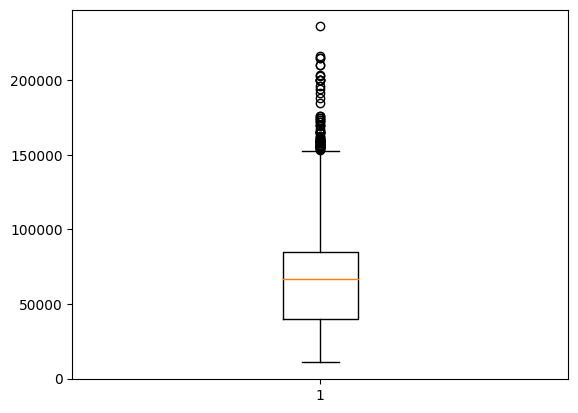

In [ ]:
#построим боксплот для наглядности
plt.boxplot(price)
plt.show()

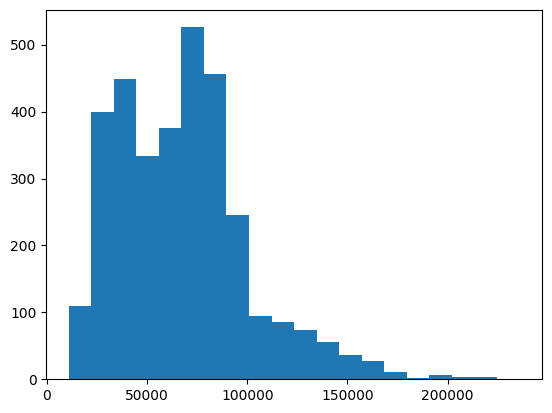

In [ ]:
#построим гистограмму
plt.hist(price, bins = 20)
plt.show()

In [ ]:
#коэффициент ассиметрии
price.skew()

0.9293999019846829

Высокий коэффициент ассиметрии показывает, что большая часть позиций представлена в левой стороне графика. Мы можем видеть это и на гистограмме - большая часть позиций имеет цену меньше ста тысяч.

In [ ]:
#коэффициент эксцесса
price.kurtosis()

1.3262822815019906

Высокий коэффициент эксцесса свидетельствует, что распределение отличается от нормального. Выдвинем гипотезу о нормальности распределения цены в качестве нулевой. Зададим уровень значимости 0.05

In [ ]:
#применим критерий ШАпиро-Уилка
stats.shapiro(df['Цена'])

ShapiroResult(statistic=0.9421876072883606, pvalue=4.408770082108204e-34)

P-value меньше уровня значимости - у нас есть основания отвергнуть гипотезу о нормальности распределения цены

In [ ]:
#Создадим копию датасета, включив в нее только те позиции, по которым есть продажи
df_copy = df.copy()

In [ ]:
df_copy = df_copy.drop(df[df['Баллы за продажи'] == 0].index)

In [ ]:
stats.shapiro(df_copy['Цена'])

ShapiroResult(statistic=0.8554624915122986, pvalue=2.717396863934597e-26)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 0 to 2922
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     791 non-null    int64 
 1   Название                       791 non-null    object
 2   Цена                           791 non-null    int64 
 3   Количество продаж              791 non-null    object
 4   Баллы за продажи               791 non-null    int64 
 5   Тип процессора                 791 non-null    object
 6   Количество ядер процессора     791 non-null    object
 7   Процессор                      791 non-null    object
 8   Тип оперативной памяти         791 non-null    object
 9   Объем оперативной памяти (Гб)  791 non-null    object
 10  Видеопроцессор                 791 non-null    object
 11  Производитель видеопроцессора  791 non-null    object
 12  Объем накопителя HDD           791 non-null    int64 
 13  Объе

In [ ]:
price2 = df_copy['Цена']

In [ ]:
#выведем данные описательной статистики только для компьютеров, у которых есть продажи
price2.describe()

count       791.000000
mean      57437.725664
std       36100.532631
min       10805.000000
25%       32495.000000
50%       45142.000000
75%       75053.500000
max      214954.000000
Name: Цена, dtype: float64

In [ ]:
#также посмотрим на 10-й и 90-й процентиль
percentile_10_price2 = price2.quantile(0.10)
percentile_90_price2 = price2.quantile(0.90)
print('10-й процентиль цены ПК: ', percentile_10_price2)
print('90-й процентиль цены ПК: ', percentile_90_price2)

10-й процентиль цены ПК:  23279.0
90-й процентиль цены ПК:  107659.0


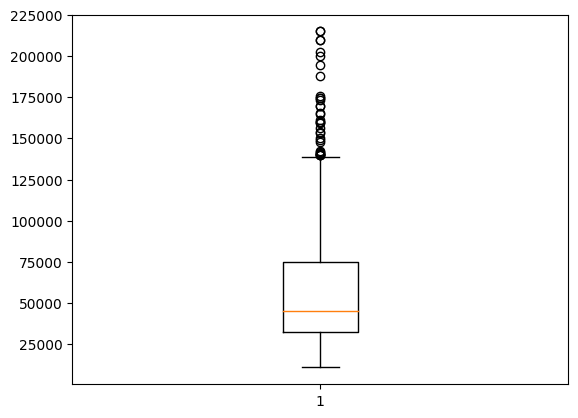

In [ ]:
plt.boxplot(price2)
plt.show()

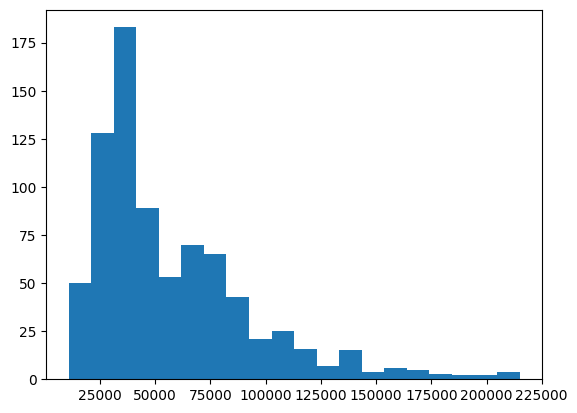

In [ ]:
plt.hist(price2, bins = 20)
plt.show()

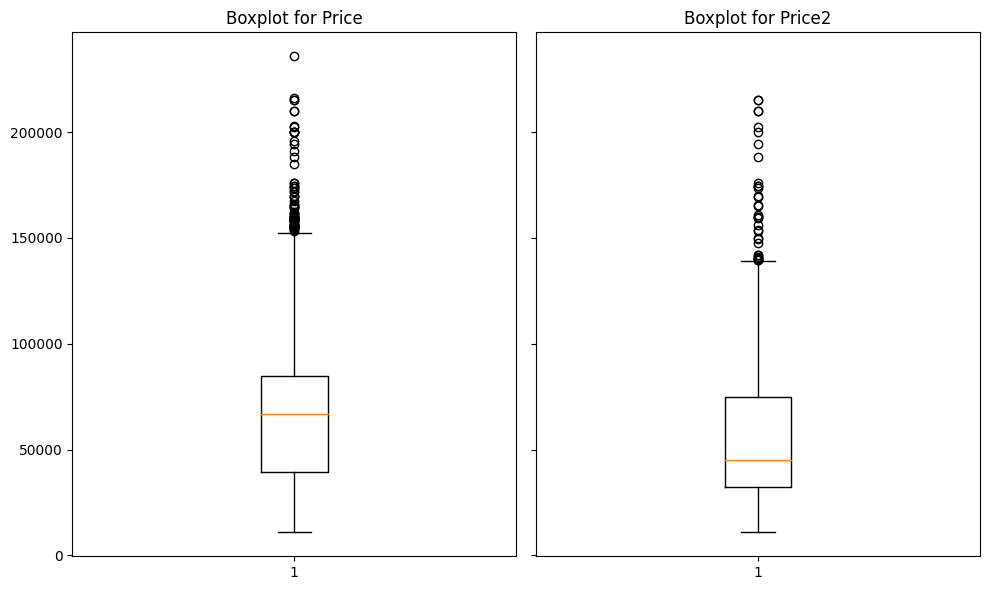

In [ ]:
#сравним цены у всех представленных компьютеров и тех по которым есть продажи
# Создание двух подграфиков
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

ax[0].boxplot(price)
ax[0].set_title('Boxplot for Price')

ax[1].boxplot(price2)
ax[1].set_title('Boxplot for Price2')

# Отображение графиков
plt.tight_layout()
plt.show()


Минимальная цена ПК - 10805.
Максимальная цена - 235 900.
75% продаются по цене ниже 84 835.
25% продаются по цене ниже 39 605.
Также было проведено сравнение цен всех ПК и тех позиций, по которым уже были продажи.
Средняя цена по всем представленным позициям 67 850 руб. а средняя цена среди позиций, по которым есть продажи 57 437 руб. При этом половина из всех представленных позиций имеет цену ниже 66 750, а из позиций с продажами половина имеет цену 45 140. В дальнейшем при анализе цен и факторов влияния на них, в основном будем обращаться к датафрейму df_copy, предполагая, что заказчику важней цены, по которым ПК действительно продаются. Был проведен тест Шапиро-Уилка и гипотеза о нормальности распределения цены отвергнута.

##Анализ продаж

In [ ]:
sales = df_copy['Баллы за продажи']

In [ ]:
sales.describe()

count    791.000000
mean      21.977244
std       75.528766
min        3.000000
25%        3.000000
50%        3.000000
75%       15.000000
max      950.000000
Name: Баллы за продажи, dtype: float64

In [ ]:
#также посмотрим на 10-й и 90-й процентиль
percentile_10_sales = sales.quantile(0.10)
percentile_90_sales = sales.quantile(0.90)
percentile_95_sales = sales.quantile(0.95)
print('10-й процентиль баллов за продажи: ', percentile_10_sales)
print('90-й процентиль баллов за продажи: ', percentile_90_sales)
print('95-й процентиль баллов за продажи: ', percentile_95_sales)

10-й процентиль баллов за продажи:  3.0
90-й процентиль баллов за продажи:  35.0
95-й процентиль баллов за продажи:  85.0


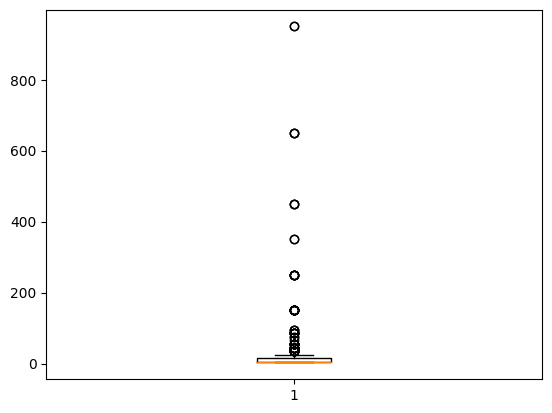

In [ ]:
plt.boxplot(sales)
plt.show()

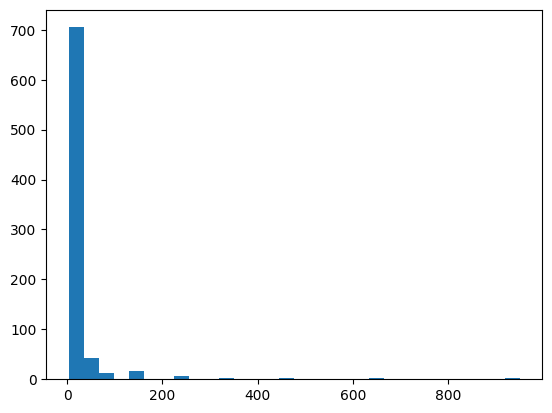

In [ ]:
plt.hist(sales, bins = 30)
plt.show()

In [ ]:
df_copy['Количество продаж'].value_counts()

до 5         437
5-10         141
11-20         90
21-30         37
41-50         16
31-40         16
101-200       16
51-60          9
81-90          7
201-300        6
90-100         3
401-500        3
501-800        3
более 800      2
301-400        2
71-80          2
61-70          1
Name: Количество продаж, dtype: int64

50% позиций имеющих продажи попадают в интервал "менее пяти раз" и 90% позиций попадают в интервал до 50 продаж. Только 5 позиций продавались более 800 раз.

Уже на основании графиков очевидно, что распределение не похоже на нормальное, однако посчитаем коэффициент ассиметрии и коэффициент эксцесса

In [ ]:
df_copy['Баллы за продажи'].skew()

8.107251461935206

In [ ]:
df_copy['Баллы за продажи'].kurtosis()

79.0911003548985

Выдвинем гипотезу о нормальности распределения продаж в качестве нулевой. Зададим уровень значимости 0.05

In [ ]:
stats.shapiro(df_copy['Баллы за продажи'])

ShapiroResult(statistic=0.24470460414886475, pvalue=0.0)

P-value меньше уровня значимости - у нас есть основания отвергнуть гипотезу о нормальности распределения продаж. Среднее количество продаж 22, 50% позиций имеющих продажи попадают в интервал "менее пяти раз" и 90% позиций попадают в интервал до 50 продаж. Только 5 позиций продавались более 800 раз.

## Распределение цены и продаж

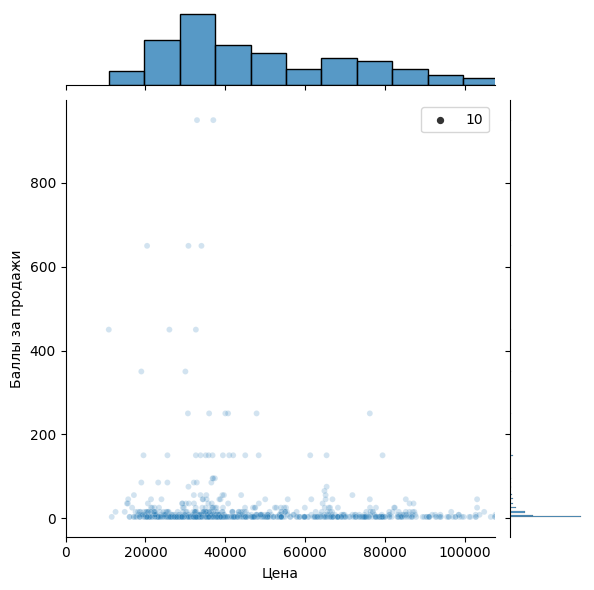

In [ ]:
sns.jointplot(x=df_copy["Цена"], y=df_copy["Баллы за продажи"],size=10, alpha=0.2)
plt.xlim(0, 107659)
plt.show()

Гистограмма показывает, что самое большое суммарное количество продаж имеют ПК с ценами 30-40 т.р.

Выдвенем гипотезу об отсутствии связи между ценой и продажами. Т.к. мы отвергли гипотезу о нормальном распределении этих показателей, применим коэффициент Спирмена

In [ ]:
stats.spearmanr(df['Цена'], df['Баллы за продажи'])

SignificanceResult(statistic=-0.23535000969526282, pvalue=1.0844363350827288e-42)

Полученное p-value меньше уровня значимости (0.05). Это указывает на статистическую значимость связи между "Ценой" и "Баллами за продажи". Значение коэффициента корреляции (-0.235) со знаком минус показывает, что связь между переменными обратная - чем выше цена, тем меньше количество продаж

In [ ]:
stats.spearmanr(df_copy['Цена'], df_copy['Баллы за продажи'])

SignificanceResult(statistic=-0.16225747027653475, pvalue=4.504004741803599e-06)

##Процессор

### Тип процессора

In [ ]:
#посмотрим какие процессоры чаще стоят в выставленных на продажу ПК
df['Тип процессора'].value_counts()

Intel Core i5        1097
Intel Core i7         695
Intel Core i3         500
AMD Ryzen 5           498
AMD Athlon            121
Intel Xeon            111
AMD Ryzen 7            71
AMD Ryzen 3            52
AMD A6                 47
Intel Pentium          37
Intel Core Quad        18
Intel Core i9          14
Intel Celeron           8
AMD Ryzen 9             5
AMD A12-9800E           4
Intel 4 ядра            2
AMD Ryzen 6             2
AMD FX-6100             2
Intel                   2
AMD Radeon RX 570       2
6010                    1
8 ядер                  1
4 ядра intel            1
AMD E1-6010             1
A10-5800KRAM            1
AMD FX-4300             1
Name: Тип процессора, dtype: int64

In [ ]:
df['Тип процессора'].describe()

count              3294
unique               26
top       Intel Core i5
freq               1097
Name: Тип процессора, dtype: object

In [ ]:
#посмотрим на те позиции, у которых уже были продажи
df_copy['Тип процессора'].value_counts()

Intel Core i5        249
Intel Core i3        160
AMD Ryzen 5          148
Intel Core i7        101
AMD Athlon            38
AMD A6                25
Intel Pentium         19
Intel Xeon            12
AMD Ryzen 3           10
Intel Core i9          9
Intel Celeron          6
AMD Ryzen 7            5
Intel 4 ядра           2
AMD E1-6010            1
AMD Ryzen 9            1
AMD Ryzen 6            1
6010                   1
4 ядра intel           1
8 ядер                 1
AMD Radeon RX 570      1
Name: Тип процессора, dtype: int64

In [ ]:
df_copy['Тип процессора'].describe()

count               791
unique               20
top       Intel Core i5
freq                249
Name: Тип процессора, dtype: object

Топ пять по встречаемости позиций в обоих датафреймах - Intel Core i5, Intel Core i7, Intel Core i3, AMD Ryzen 5, AMD Athlon

### Количество ядер процессора

In [ ]:
df['Количество ядер процессора'].describe()

count     3294
unique      10
top          6
freq      1406
Name: Количество ядер процессора, dtype: object

In [ ]:
df_copy['Количество ядер процессора'].describe()

count     791
unique      9
top         6
freq      327
Name: Количество ядер процессора, dtype: object

In [ ]:
df['Количество ядер процессора'].value_counts()

6     1406
4      755
8      424
12     283
2      181
10     127
24      60
16      44
14       7
20       7
Name: Количество ядер процессора, dtype: int64

In [ ]:
#среди позиций с продажами
df_copy['Количество ядер процессора'].value_counts()

6     327
4     235
2      88
8      52
12     43
10     33
16     10
14      2
24      1
Name: Количество ядер процессора, dtype: int64

Наиболее часто встречаются 6-ядерные процессоры. Чуть реже - 4-ядерные

### Процессор

In [ ]:
#Т.к. тип процессора и количество ядер лучше рассматривать вместе посмотрим на объединенную колонку

In [ ]:
df['Процессор'].describe()

count                3294
unique                 52
top       Intel Core i5 6
freq                  856
Name: Процессор, dtype: object

In [ ]:
df_copy['Процессор'].describe()

count                 791
unique                 37
top       Intel Core i5 6
freq                  168
Name: Процессор, dtype: object

In [ ]:
#посмотрим какие процессоры встречаются в большем количестве представленных ПК
df_copy['Процессор'].value_counts()

Intel Core i5 6        168
Intel Core i3 4        157
AMD Ryzen 5 6          148
Intel Core i5 4         43
Intel Core i7 8         42
Intel Core i7 12        40
Intel Core i5 10        33
AMD Athlon 2            32
AMD A6 2                25
Intel Pentium 2         15
Intel Core i7 4         12
Intel Core i9 16         9
AMD Ryzen 3 4            7
Intel Core i7 6          6
AMD Athlon 4             6
Intel Celeron 2          5
AMD Ryzen 7 8            5
Intel Xeon 8             4
Intel Xeon 6             4
Intel Pentium 4          4
Intel Core i5 2          3
Intel Core i3 2          3
AMD Ryzen 3 2            3
Intel Core i5 14         2
Intel 4 ядра 4           2
Intel Xeon 12            2
Intel Core i7 16         1
AMD Ryzen 9 12           1
AMD Radeon RX 570 4      1
8 ядер 8                 1
AMD Ryzen 6 6            1
AMD E1-6010 2            1
Intel Xeon 4             1
4 ядра intel 4           1
6010 2                   1
Intel Celeron 4          1
Intel Xeon 24            1
N

In [ ]:
df['Процессор'].value_counts()

Intel Core i5 6        856
AMD Ryzen 5 6          498
Intel Core i3 4        477
Intel Core i7 8        336
Intel Core i7 12       262
Intel Core i5 10       123
Intel Core i5 4        106
AMD Ryzen 7 8           71
AMD Athlon 2            68
Intel Xeon 24           60
AMD Athlon 4            53
AMD Ryzen 3 4           48
AMD A6 2                46
Intel Core i7 6         36
Intel Pentium 2         32
Intel Core i7 16        31
Intel Core i7 4         30
Intel Core Quad 4       18
Intel Core i3 2         17
Intel Xeon 12           16
Intel Xeon 8            16
Intel Core i9 16        10
Intel Xeon 20            7
Intel Core i5 14         7
Intel Celeron 2          7
Intel Core i3 6          6
Intel Xeon 6             6
Intel Pentium 4          5
AMD Ryzen 9 12           4
Intel Core i9 10         4
AMD A12-9800E 4          4
Intel Core i5 2          4
Intel Xeon 4             4
AMD Ryzen 3 2            3
AMD Ryzen 6 6            2
Intel 4 ядра 4           2
Intel Xeon 16            2
A

In [ ]:
#посмотрим самые продаваемые позиции
proc_top_list = df_copy.groupby('Процессор')['Баллы за продажи'].sum().sort_values(ascending=False)

In [ ]:
proc_top_list

Процессор
AMD Ryzen 5 6          4382
Intel Core i5 6        2599
Intel Core i3 4        2563
Intel Core i7 4        1012
Intel Pentium 2        1004
Intel Core i5 4         984
AMD A6 2                779
Intel Core i5 2         603
Intel Core i7 12        565
AMD Athlon 4            551
Intel Celeron 2         548
AMD Athlon 2            417
Intel Xeon 6            323
Intel Core i3 2         250
Intel Core i7 8         248
Intel Core i5 10        217
Intel Core i9 16         69
Intel Pentium 4          39
AMD Ryzen 3 4            26
AMD Ryzen 3 2            26
4 ядра intel 4           25
Intel 4 ядра 4           23
Intel Core i7 6          18
Intel Xeon 8             17
AMD Ryzen 7 8            15
AMD E1-6010 2            15
Intel Xeon 4             15
Intel Core i5 14         11
Intel Xeon 12            11
8 ядер 8                  8
6010 2                    3
Intel Celeron 4           3
Intel Core i7 16          3
AMD Ryzen 9 12            3
AMD Ryzen 6 6             3
AMD Radeon

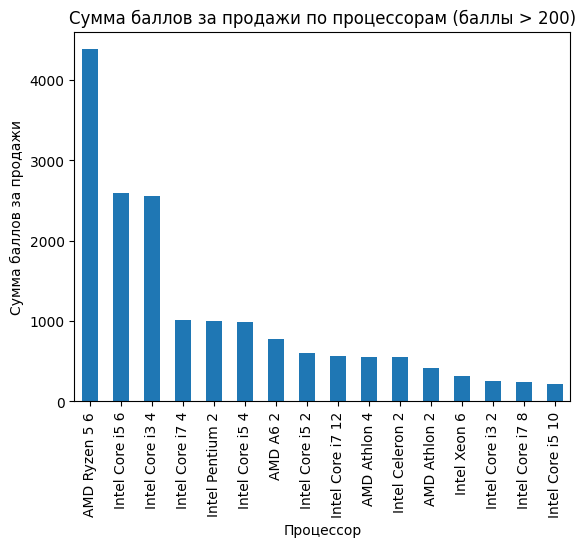

In [ ]:
#построим столбчатую диаграмму для топ 16 типов
sum_by_proc = proc_top_list[proc_top_list > 200]

sum_by_proc.plot.bar()

plt.xlabel('Процессор')
plt.ylabel('Сумма баллов за продажи')
plt.title('Сумма баллов за продажи по процессорам (баллы > 200)')

plt.show()

In [ ]:
# Посчитаем средние цены ПК с наиболее популярными процессорами (среди проданных)
mean1 = df_copy[df_copy['Процессор'].isin(sum_by_proc.index)].groupby('Процессор')['Цена'].mean()
mean1

Процессор
AMD A6 2             22018.160000
AMD Athlon 2         32585.343750
AMD Athlon 4         35186.500000
AMD Ryzen 5 6        49098.993243
Intel Celeron 2      15588.800000
Intel Core i3 2      23600.000000
Intel Core i3 4      40349.286624
Intel Core i5 10    117493.121212
Intel Core i5 2      26480.000000
Intel Core i5 4      29003.860465
Intel Core i5 6      71340.029762
Intel Core i7 12    121841.950000
Intel Core i7 4      56212.500000
Intel Core i7 8      42907.095238
Intel Pentium 2      30153.133333
Intel Xeon 6         36901.750000
Name: Цена, dtype: float64

In [ ]:
# Посчитаем средние цены ПК с наиболее популярными процессорами (среди представленных)
mean2 = df[df['Процессор'].isin(sum_by_proc.index)].groupby('Процессор')['Цена'].mean()
mean2

Процессор
AMD A6 2             23221.565217
AMD Athlon 2         31744.191176
AMD Athlon 4         39931.283019
AMD Ryzen 5 6        59636.740964
Intel Celeron 2      20949.428571
Intel Core i3 2      28101.352941
Intel Core i3 4      43741.748428
Intel Core i5 10    112213.097561
Intel Core i5 2      25310.000000
Intel Core i5 4      30163.481132
Intel Core i5 6      72536.136682
Intel Core i7 12    111034.015267
Intel Core i7 4      59593.000000
Intel Core i7 8      75984.943452
Intel Pentium 2      33179.093750
Intel Xeon 6         35891.000000
Name: Цена, dtype: float64

In [ ]:
#интересно посмотреть на позиции по которым средняя цена в общем датафрейме ниже, чем средняя цена с продажами
mean_new = mean2[mean2 < mean1].index
mean_new

Index(['AMD Athlon 2', 'Intel Core i5 10', 'Intel Core i5 2',
       'Intel Core i7 12', 'Intel Xeon 6'],
      dtype='object', name='Процессор')

In [ ]:
df_top_proc = df[df['Процессор'].isin(sum_by_proc.index)]

Теперь нам нужно проверить, есть ли вообще статистически значимая связь между ценой и процессором. Визуализируем наши данные - построим ящики с усами для самых продаваемых позиций

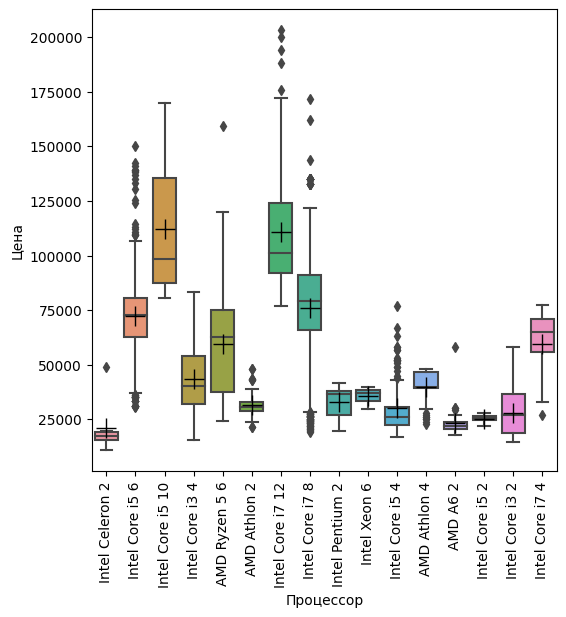

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Процессор', y='Цена', data=df_top_proc,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [ ]:
df_top_proc2= df_top_proc.copy()

Избавимся от выбросов

In [ ]:
for proc in df_top_proc2['Процессор'].unique():
  Q1 = df_top_proc2[df_top_proc2['Процессор']==proc]['Цена'].quantile(0.25)
  Q3 = df_top_proc2[df_top_proc2['Процессор']==proc]['Цена'].quantile(0.75)
  IQR = Q3 - Q1
  upper = df_top_proc2[(df_top_proc2['Процессор']==proc)&(df_top_proc2['Цена']>=(Q3+1.5*IQR))]
  lower = df_top_proc2[(df_top_proc2['Процессор']==proc)&(df_top_proc2['Цена']<=(Q1-1.5*IQR))]
  df_top_proc2.drop(upper.index, inplace = True)
  df_top_proc2.drop(lower.index, inplace = True)

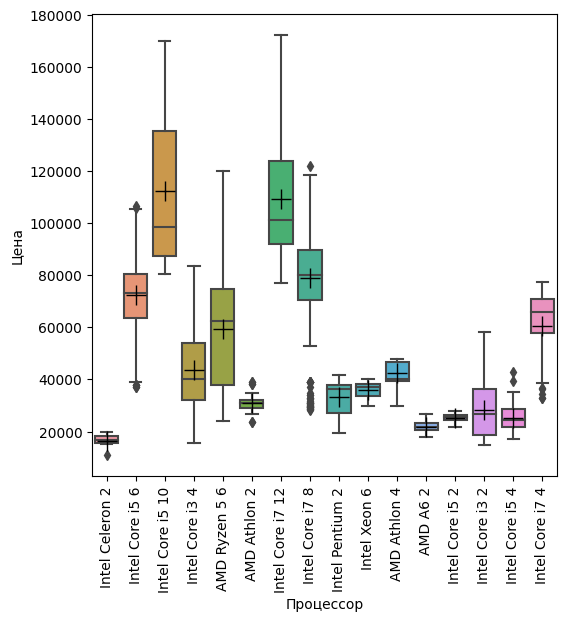

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Процессор', y='Цена', data=df_top_proc2,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

Выдвинем гипотезу - Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05. Проверим распределение в группах

In [ ]:
df_p1 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD Ryzen 5 6']['Цена'])
df_p2 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 6']['Цена'])
df_p3 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i3 4']['Цена'])
df_p4 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i7 4']['Цена'])
df_p5 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Pentium 2']['Цена'])
df_p6 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 4']['Цена'])
df_p7 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD A6 2']['Цена'])
df_p8 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 2']['Цена'])
df_p9 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i7 12']['Цена'])
df_p10 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD Athlon 4']['Цена'])
df_p11 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Celeron 2']['Цена'])
df_p12 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD Athlon 2']['Цена'])
df_p13 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Xeon 6']['Цена'])
df_p14 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i3 2']['Цена'])
df_p15 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i7 8']['Цена'])
df_p16 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 10']['Цена'])
print(stats.shapiro(df_p1))
print(stats.shapiro(df_p2))
print(stats.shapiro(df_p3))
print(stats.shapiro(df_p4))
print(stats.shapiro(df_p5))
print(stats.shapiro(df_p6))
print(stats.shapiro(df_p7))
print(stats.shapiro(df_p8))
print(stats.shapiro(df_p9))
print(stats.shapiro(df_p10))
print(stats.shapiro(df_p11))
print(stats.shapiro(df_p12))
print(stats.shapiro(df_p13))
print(stats.shapiro(df_p14))
print(stats.shapiro(df_p15))
print(stats.shapiro(df_p16))

ShapiroResult(statistic=0.9330851435661316, pvalue=3.998400731602264e-14)
ShapiroResult(statistic=0.9928923845291138, pvalue=0.0006454698159359396)
ShapiroResult(statistic=0.9625003933906555, pvalue=1.124355719639425e-09)
ShapiroResult(statistic=0.8396244049072266, pvalue=0.0004687103792093694)
ShapiroResult(statistic=0.8791796565055847, pvalue=0.0019043807405978441)
ShapiroResult(statistic=0.9550267457962036, pvalue=0.0039549958892166615)
ShapiroResult(statistic=0.9614152908325195, pvalue=0.16592806577682495)
ShapiroResult(statistic=0.9379947185516357, pvalue=0.6421374678611755)
ShapiroResult(statistic=0.9260699152946472, pvalue=5.159373483998309e-10)
ShapiroResult(statistic=0.8260090351104736, pvalue=9.344817044620868e-06)
ShapiroResult(statistic=0.9263414740562439, pvalue=0.55215984582901)
ShapiroResult(statistic=0.9475727081298828, pvalue=0.01199420914053917)
ShapiroResult(statistic=0.9096072912216187, pvalue=0.4338180720806122)
ShapiroResult(statistic=0.8769711852073669, pvalue=0.

Мы применили тест Шапиро-Уилка, по многим позициям p-value меньше уровня значимости, этого достаточно, чтобы отвергнуть нулевую гипотезу. Будем использовать критерий сравнения групп Краскела-Уоллиса. Предположим, что нет статистически значимых различий между группами.

In [ ]:
stats.mstats.kruskalwallis(df_p1,df_p2,df_p3,df_p4,df_p5,df_p6,df_p7,df_p8,df_p9,df_p10,df_p11,df_p12,df_p13,df_p14,df_p15,df_p16)

KruskalResult(statistic=1787.133956518229, pvalue=0.0)

Статистические различия есть. Проанализируем подобным образом связь с продажами.

In [ ]:
df_pv1 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD Ryzen 5 6']['Баллы за продажи'])
df_pv2 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 6']['Баллы за продажи'])
df_pv3 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i3 4']['Баллы за продажи'])
df_pv4 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i7 4']['Баллы за продажи'])
df_pv5 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Pentium 2']['Баллы за продажи'])
df_pv6 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 4']['Баллы за продажи'])
df_pv7 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD A6 2']['Баллы за продажи'])
df_pv8 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 2']['Баллы за продажи'])
df_pv9 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i7 12']['Баллы за продажи'])
df_pv10 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD Athlon 4']['Баллы за продажи'])
df_pv11 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Celeron 2']['Баллы за продажи'])
df_pv12 = np.array(df_top_proc2[df_top_proc2['Процессор']=='AMD Athlon 2']['Баллы за продажи'])
df_pv13 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Xeon 6']['Баллы за продажи'])
df_pv14 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i3 2']['Баллы за продажи'])
df_pv15 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i7 8']['Баллы за продажи'])
df_pv16 = np.array(df_top_proc2[df_top_proc2['Процессор']=='Intel Core i5 10']['Баллы за продажи'])
print(stats.shapiro(df_pv1))
print(stats.shapiro(df_pv2))
print(stats.shapiro(df_pv3))
print(stats.shapiro(df_pv4))
print(stats.shapiro(df_pv5))
print(stats.shapiro(df_pv6))
print(stats.shapiro(df_pv7))
print(stats.shapiro(df_pv8))
print(stats.shapiro(df_pv9))
print(stats.shapiro(df_pv10))
print(stats.shapiro(df_pv11))
print(stats.shapiro(df_pv12))
print(stats.shapiro(df_pv13))
print(stats.shapiro(df_pv14))
print(stats.shapiro(df_pv15))
print(stats.shapiro(df_pv16))

ShapiroResult(statistic=0.18557143211364746, pvalue=1.0811017652265964e-41)
ShapiroResult(statistic=0.18650811910629272, pvalue=0.0)
ShapiroResult(statistic=0.1282714605331421, pvalue=5.5281224417614033e-42)
ShapiroResult(statistic=0.19656485319137573, pvalue=1.638881912124912e-11)
ShapiroResult(statistic=0.18057185411453247, pvalue=3.2634921241087023e-12)
ShapiroResult(statistic=0.12806040048599243, pvalue=2.0313043606309157e-20)
ShapiroResult(statistic=0.33791083097457886, pvalue=1.5855776977838354e-12)
ShapiroResult(statistic=0.8304526209831238, pvalue=0.16898532211780548)
ShapiroResult(statistic=0.17118120193481445, pvalue=4.2076926082175355e-32)
ShapiroResult(statistic=0.23126089572906494, pvalue=5.478590129302796e-14)
ShapiroResult(statistic=0.5883511900901794, pvalue=0.00033103409805335104)
ShapiroResult(statistic=0.4482992887496948, pvalue=1.147566742153161e-13)
ShapiroResult(statistic=0.6434020400047302, pvalue=0.001481274259276688)
ShapiroResult(statistic=0.42906856536865234,

In [ ]:
stats.mstats.kruskalwallis(df_pv1,df_pv2,df_pv3,df_pv4,df_pv5,df_pv6,df_pv7,df_pv8,df_pv9,df_pv10,df_pv11,df_pv12,df_pv13,df_pv14,df_pv15,df_pv16)

KruskalResult(statistic=180.47546299260742, pvalue=1.9064085341732054e-30)

Объединив тип процессора и количество ядер процессора мы выделели топ 16 процессоров в продаваемых ПК. Были выявлены значимые статистические различия между группами, как по цене, так и по количеству продаж. Несмотря на то, что наиболее представленным является Intel Core i5/6 , самый продаваемый AMD Ryzen 5/6 (условное количество продаж 4382). Затем следует Intel Core i5/6 (2599 продаж), Intel Core i3/4 (2563). Также были расчитаны средние цены на ПК с топ-16 процессоров. Самые высокие средние цены имеют ПК Intel Core i5/10 (117 т.р.) и Intel Core i7/12 (122 т.р.)

## Видеопроцессор

In [ ]:
df_copy['Производитель видеопроцессора'].describe()

count        791
unique         5
top       NVIDIA
freq         478
Name: Производитель видеопроцессора, dtype: object

In [ ]:
df_copy['Производитель видеопроцессора'].value_counts()

NVIDIA          478
AMD             167
Intel           136
не заполнено      9
Radeon            1
Name: Производитель видеопроцессора, dtype: int64

In [ ]:
df['Производитель видеопроцессора'].value_counts()

NVIDIA          2429
AMD              480
Intel            333
не заполнено      49
Afox               1
Radeon             1
VEGA               1
Name: Производитель видеопроцессора, dtype: int64

In [ ]:
sum_by_video = df_copy.groupby('Производитель видеопроцессора')['Баллы за продажи'].sum()
print(sum_by_video)

Производитель видеопроцессора
AMD             5604
Intel           3372
NVIDIA          8319
Radeon             3
не заполнено      86
Name: Баллы за продажи, dtype: int64


In [ ]:
top_3_videos = sum_by_video.head(3)

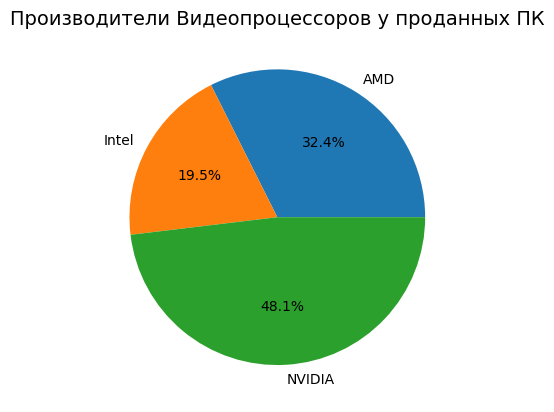

In [ ]:
top_3_videos = sum_by_video.head(3)
labels= ['AMD', 'Intel', 'NVIDIA']
plt.pie(top_3_videos, labels = labels, autopct='%1.1f%%')
plt.title(label = "Производители Видеопроцессоров у проданных ПК", fontsize = 14)
plt.show()

In [ ]:
 top_video = ('AMD', 'Intel', 'NVIDIA')

In [ ]:
df_filtered = df[df['Производитель видеопроцессора'].isin(top_video)]

In [ ]:
sum_by_vid = df_copy.groupby(['Производитель видеопроцессора', 'Видеопроцессор'])['Баллы за продажи'].sum()
sum_by_vid

Производитель видеопроцессора  Видеопроцессор         
AMD                            AMD                          15
                               AMD Radeon R5               779
                               AMD Radeon RX 470             8
                               AMD Radeon RX 550             6
                               AMD Radeon RX 570             3
                               AMD Radeon RX 580           326
                               AMD Radeon RX 6500            9
                               AMD Radeon RX 6600            6
                               AMD Radeon Vega 3           379
                               AMD Radeon Vega 7          4046
                               AMD Radeon Vega 8            27
Intel                          Intel HD Graphics          1248
                               Intel HD Graphics 2000      726
                               Intel HD Graphics 2500       18
                               Intel HD Graphics 4000        6


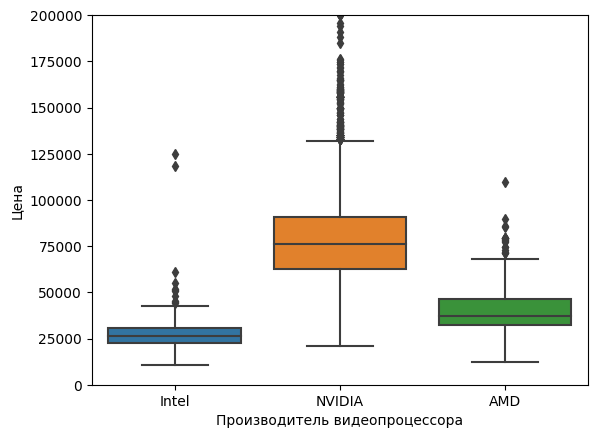

In [ ]:
#интересно посмотреть на разброс цен на компьютеры с видеопроцессорами разных производителей
sns.boxplot(x=df_filtered['Производитель видеопроцессора'], y = df_filtered['Цена'])
plt.axis(ymin=0, ymax = 200000)
plt.show()

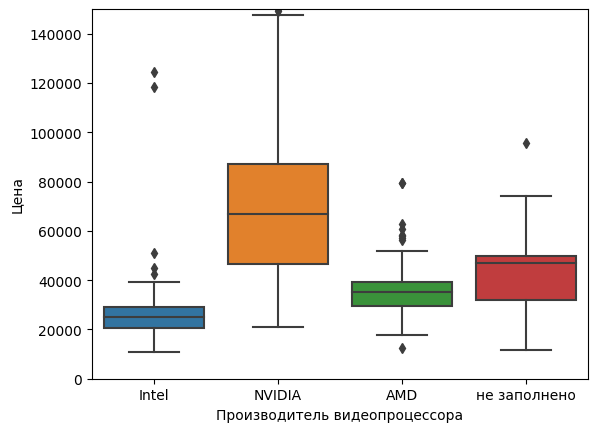

In [ ]:
#посмотрим среди проданных ограничив ось у
df_cl = df_copy[df_copy['Производитель видеопроцессора']!='Radeon']
sns.boxplot(x=df_cl['Производитель видеопроцессора'], y = df_copy['Цена'])
plt.axis(ymin=0, ymax = 150000)
plt.show()

Можно предположить, что видеопроцессоры NVIDIA как правило стоят в более дорогих компьютерах, чем процессоры Intel и AMD. Проверим наличие значимых различий между группами с помощью статистики. Во-первых, нужно проверить относятся ли выборки к генеральным совокупностям с нормальным распределением.
Нулевая гипотеза - принадлежат. Применим критерий Шапиро-Уилка.

In [ ]:
df_vi1 = np.array(df_cl[df_cl['Производитель видеопроцессора']=='Intel']['Цена'])
df_vi2 = np.array(df_cl[df_cl['Производитель видеопроцессора']=='NVIDIA']['Цена'])
df_vi3 = np.array(df_cl[df_cl['Производитель видеопроцессора']=='AMD']['Цена'])
print(stats.shapiro(df_vi1))
print(stats.shapiro(df_vi2))
print(stats.shapiro(df_vi3))

ShapiroResult(statistic=0.5038957595825195, pvalue=1.647847694770083e-19)
ShapiroResult(statistic=0.8926534056663513, pvalue=8.932801189937726e-18)
ShapiroResult(statistic=0.9248243570327759, pvalue=1.2713388741758536e-07)


Отвергаем нулевую гипотезу. Будем использовать критерий сравнения групп Краскела-Уоллиса. Предположим, что нет статистически значимых различий между группами. Уровень значимости зададим 0.05

In [ ]:
stats.mstats.kruskalwallis(df_vi1,df_vi2,df_vi3)

KruskalResult(statistic=427.23446969771396, pvalue=1.687382985761408e-93)

Различия статистически значимы. Сделаем такой же анализ для количества.


In [ ]:
df_vc1 = np.array(df_cl[df_cl['Производитель видеопроцессора']=='Intel']['Баллы за продажи'])
df_vc2 = np.array(df_cl[df_cl['Производитель видеопроцессора']=='NVIDIA']['Баллы за продажи'])
df_vc3 = np.array(df_cl[df_cl['Производитель видеопроцессора']=='AMD']['Баллы за продажи'])
print(stats.shapiro(df_vc1))
print(stats.shapiro(df_vc2))
print(stats.shapiro(df_vc3))

ShapiroResult(statistic=0.1961105465888977, pvalue=4.736438415221833e-24)
ShapiroResult(statistic=0.21052157878875732, pvalue=1.261266708784838e-40)
ShapiroResult(statistic=0.41243040561676025, pvalue=3.708702065974303e-23)


In [ ]:
stats.mstats.kruskalwallis(df_vc1,df_vc2,df_vc3)

KruskalResult(statistic=23.36754928261919, pvalue=8.429487004932312e-06)

На рынке представлены 3 основных производителя Видеопроцессоров - NVIDIA, AMD, Intel. Различия между количеством продаж в группах разделенных по производителю Видеопроцессора статистически значимы. NVIDIA является как наиболее часто представленной, так и наиболее продаваемой в составе ПК позицией - почти у 50% имеющих продажи ПК Видеопроцессор NVIDIA. При этом самыми продаваемыми среди процессоров NVIDIA являются: NVIDIA GeForce GT 1030, NVIDIA GeForce GTX 1660, NVIDIA GeForce RTX 3050; среди Intel: Intel HD Graphics, Intel HD Graphics 610, Intel HD Graphics 2000; среди AMD: AMD Radeon Vega 7,  AMD Radeon R5, AMD Radeon Vega 3. При этом важно отметить, что самая популярная модель видеопроцессора AMD Radeon Vega 7 (продана более 4000). Также были выялены статистически значимые различия в ценах на ПК в зависимости от производителя Видеопроцессора. Компьютеры с NVIDIA дороже других - болше половины из них стоит дороже 70 000. 75% компьютеров с видеопроцессором Intel дешевле 30 000, а с видеопроцессором AMD дешевле 40 000.

##Оперативная память

In [ ]:
df['Тип оперативной памяти'].describe()

count      3294
unique        7
top       DDR 4
freq       2904
Name: Тип оперативной памяти, dtype: object

In [ ]:
df['Тип оперативной памяти'].mode()

0    DDR 4
Name: Тип оперативной памяти, dtype: object

In [ ]:
df['Тип оперативной памяти'].value_counts()

DDR 4           2904
DDR 3            305
не заполнено      67
DDR 5             14
16                 2
16 Гб              1
RAM 16 ГБ          1
Name: Тип оперативной памяти, dtype: int64

In [ ]:
df_copy['Тип оперативной памяти'].value_counts()

DDR 4           659
DDR 3           123
не заполнено      7
DDR 5             2
Name: Тип оперативной памяти, dtype: int64

In [ ]:
ddr=df[df['Тип оперативной памяти'].isin(['DDR 4', 'DDR 3'])]

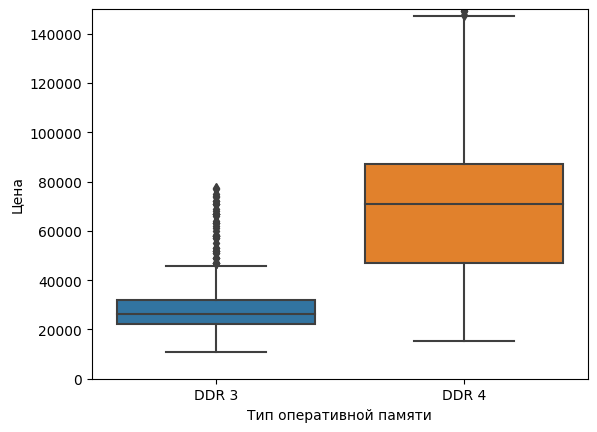

In [ ]:
#интересно посмотреть на разброс цен на компьютеры с разными типами оперативки
sns.boxplot(x=ddr['Тип оперативной памяти'], y = ddr['Цена'])
plt.axis(ymin=0, ymax = 150000)
plt.show()

Т.к. у нас всего две основных группы типов оперативной памяти, для выявления статистической значимости различий можем использовать критерий Манна-Уитни. Нулевые гипотезы - отсутвие различий (по распределению цены и количеству продаж)

In [ ]:
group1 = df[df['Тип оперативной памяти'] == 'DDR 3']['Цена']

In [ ]:
group2 = df[df['Тип оперативной памяти'] == 'DDR 4']['Цена']

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
statistic, p = mannwhitneyu(group1, group2)

In [ ]:
print("Статистика Манна-Уитни:", statistic)
print("p-значение:", p)

Статистика Манна-Уитни: 78550.5
p-значение: 7.709340248497342e-124


In [ ]:
gr1 = df[df['Тип оперативной памяти'] == 'DDR 3']['Баллы за продажи']
gr2 = df[df['Тип оперативной памяти'] == 'DDR 4']['Баллы за продажи']

In [ ]:
statistic, p = mannwhitneyu(gr1, gr2)
print("Статистика Манна-Уитни:", statistic)
print("p-значение:", p)

Статистика Манна-Уитни: 517318.0
p-значение: 1.2229441395505778e-10


В группах присутствуют статистически значимые различия.

In [ ]:
#посмотрим какие типы ОП в проданных ПК и сколько их
mem_list = df_copy.groupby('Тип оперативной памяти')['Баллы за продажи'].sum()
mem_list

Тип оперативной памяти
DDR 3            3707
DDR 4           13589
DDR 5              11
не заполнено       77
Name: Баллы за продажи, dtype: int64

In [ ]:
mem_list = mem_list[mem_list > 100]

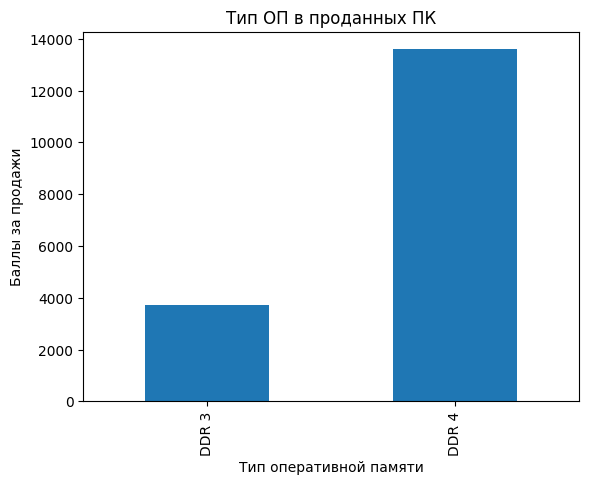

In [ ]:
mem_list.plot.bar()

plt.ylabel('Баллы за продажи')
plt.title('Тип ОП в проданных ПК')

plt.show()

In [ ]:
df_copy['Объем оперативной памяти (Гб)'].unique()

array(['4', '8', '16', '32', '6', '64'], dtype=object)

In [ ]:
df_copy['Объем оперативной памяти (Гб)'].describe()

count     791
unique      6
top        16
freq      416
Name: Объем оперативной памяти (Гб), dtype: object

In [ ]:
df_copy['Объем оперативной памяти (Гб)'].value_counts()

16    416
8     165
32    157
4      36
64     16
6       1
Name: Объем оперативной памяти (Гб), dtype: int64

In [ ]:
gb_list = df_copy.groupby('Объем оперативной памяти (Гб)')['Баллы за продажи'].sum()
gb_list

Объем оперативной памяти (Гб)
16    8835
32    1928
4     1801
6        3
64     112
8     4705
Name: Баллы за продажи, dtype: int64

In [ ]:
gb_list = gb_list[gb_list > 200]

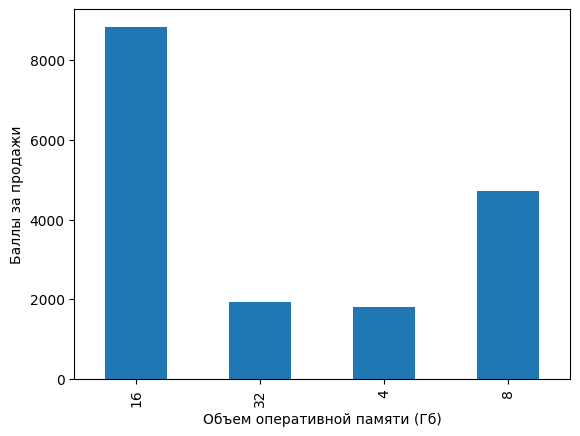

In [ ]:
gb_list.plot.bar()

plt.ylabel('Баллы за продажи')

plt.show()

In [ ]:
ddr2=df_copy[df_copy['Тип оперативной памяти'].isin(['DDR 4', 'DDR 3'])]

In [ ]:
wd=pd.crosstab(ddr2['Тип оперативной памяти'], ddr2['Объем оперативной памяти (Гб)']); wd

Объем оперативной памяти (Гб),16,32,4,6,64,8
Тип оперативной памяти,,,,,,
DDR 3,55,0,20,0,0,48
DDR 4,359,156,13,1,16,114


Два основных типа оперативной памяти DDR3 и DDR4. DDR5 встречается всего 2 раза в проданных ПК. Был применен критерий Манна-Уитни для выявления значимости различий у ПК с DDR3 и DDR4 в ценах и количестве продаж. Различия признаны значимыми. Построенные ящики с усами позволяют судить о разнице в ценах на ПК. Медианная цена на ПК с DDR3 около 24 000, а с DDR4 около 70 000. Только 25% ПК с DDR4 стоят меньше 50 000. При этом в проданных ПК гораздо чаще стоит DDR4 (почти 13600 продаж против 3700 у DDR3). Самым популярным объемом оперативной памяти является 16 Гб, затем идут 8, 32 и 4.

## Жесткий диск

### Тип накопителя

Создадим новую колонку "Тип накопителя" и закодируем значения следующим образом:
1 - у ПК только HDD;
2 - у ПК только SSD;
3 - У ПК HDD и SSD

In [ ]:
df_copy['Тип накопителя'] = np.where((df_copy['Объем накопителя SSD'] == 0), 1,
                               np.where((df_copy['Объем накопителя SSD'] > 0) & (df_copy['Объем накопителя HDD'] > 0), 3, 2))

In [ ]:
df_copy['Тип накопителя'] = df_copy['Тип накопителя'].astype(str)

In [ ]:
df_copy['Тип накопителя'].describe()

count     791
unique      3
top         2
freq      571
Name: Тип накопителя, dtype: object

In [ ]:
df_copy['Тип накопителя'].mode()

0    2
Name: Тип накопителя, dtype: object

In [ ]:
df_copy['Тип накопителя'].value_counts()

2    571
3    195
1     25
Name: Тип накопителя, dtype: int64

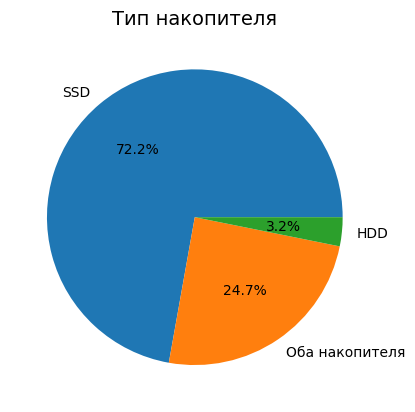

In [ ]:
disk_count = df_copy['Тип накопителя'].value_counts()
labels = ['SSD', 'Оба накопителя', 'HDD']
plt.pie(disk_count, labels = labels, autopct='%1.1f%%')
plt.title(label = "Тип накопителя", fontsize = 14)
plt.show()

In [ ]:
df_copy.groupby('Тип накопителя')[['Цена']].mean()

,Цена
Тип накопителя,
1,23394.520000
2,52141.472855
3,77310.753846


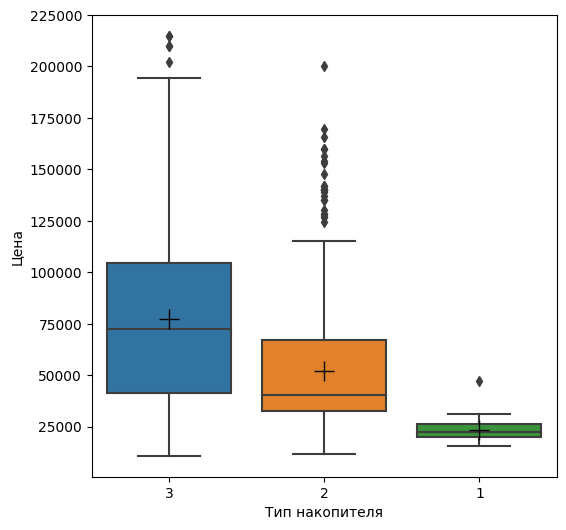

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Тип накопителя', y='Цена', data=df_copy,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.show()

Избавимся от выбросов

In [ ]:
df_disk = df_copy.copy()

In [ ]:
for tip in df_disk['Тип накопителя'].unique():
  Q1 = df_disk[df_disk['Тип накопителя']==tip]['Цена'].quantile(0.25)
  Q3 = df_disk[df_disk['Тип накопителя']==tip]['Цена'].quantile(0.75)
  IQR = Q3 - Q1
  upper = df_disk[(df_disk['Тип накопителя']==tip)&(df_disk['Цена']>=(Q3+1.5*IQR))]
  lower = df_disk[(df_disk['Тип накопителя']==tip)&(df_disk['Цена']<=(Q1-1.5*IQR))]
  df_disk.drop(upper.index, inplace = True)
  df_disk.drop(lower.index, inplace = True)

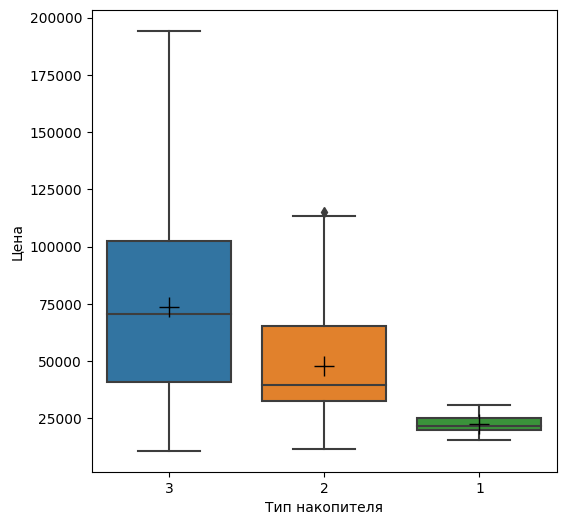

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Тип накопителя', y='Цена', data=df_disk,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.show()

In [ ]:
df_disk['Тип накопителя'].value_counts()

2    546
3    190
1     24
Name: Тип накопителя, dtype: int64

Проверим нормальность распределения

In [ ]:
df_t1 = np.array(df_disk[df_disk['Тип накопителя']=='1']['Цена'])
df_t2 = np.array(df_disk[df_disk['Тип накопителя']=='2']['Цена'])
df_t3 = np.array(df_disk[df_disk['Тип накопителя']=='3']['Цена'])
print(stats.shapiro(df_t1))
print(stats.shapiro(df_t2))
print(stats.shapiro(df_t3))


ShapiroResult(statistic=0.9535975456237793, pvalue=0.3235841691493988)
ShapiroResult(statistic=0.922450065612793, pvalue=3.7378957804379395e-16)
ShapiroResult(statistic=0.940782368183136, pvalue=4.85572456909722e-07)


Для оценки влияния категориального признака на целевой (количественный) - цену используем непараметрический критерия сравнения групп Краскела-Уоллиса. Гипотеза Н0: статистически значимые отличия в группах отсутсвуют

In [ ]:
stats.mstats.kruskalwallis(df_t1,df_t2,df_t3)

KruskalResult(statistic=105.89703680724277, pvalue=1.0109987819513048e-23)

Таким образом, на основании проведенного теста можно сделать вывод о статистически значимых различиях в цене между разными типами накопителей.
Сделаем то же самое для количества продаж.


In [ ]:
df_ts1 = np.array(df_disk[df_disk['Тип накопителя']=='1']['Баллы за продажи'])
df_ts2 = np.array(df_disk[df_disk['Тип накопителя']=='2']['Баллы за продажи'])
df_ts3 = np.array(df_disk[df_disk['Тип накопителя']=='3']['Баллы за продажи'])
print(stats.shapiro(df_ts1))
print(stats.shapiro(df_ts2))
print(stats.shapiro(df_ts3))

ShapiroResult(statistic=0.746576189994812, pvalue=4.44075049017556e-05)
ShapiroResult(statistic=0.2611738443374634, pvalue=7.561406513496713e-42)
ShapiroResult(statistic=0.2587502598762512, pvalue=5.266868352306973e-27)


In [ ]:
disk_tip_list = df_copy.groupby('Тип накопителя')['Баллы за продажи'].sum().sort_values(ascending=False)

In [ ]:
disk_tip_list

Тип накопителя
2    14268
3     2814
1      302
Name: Баллы за продажи, dtype: int64

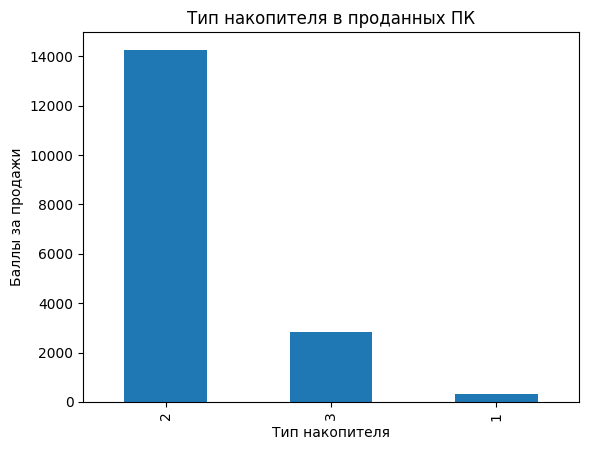

In [ ]:
disk_tip_list.plot.bar()

plt.ylabel('Баллы за продажи')
plt.title('Тип накопителя в проданных ПК')

plt.show()

Выявлены статистически значимые различия между разными типами накопителей по цене и по количеству. У 72% проданных ПК установлен только SSd, почти у 25% SSD и HDD, оба диска у 3%. Средняя цена ПК с SSD 52 140, у ПК с HDD 23 400, у ПК с обоими дисками 77 310. По количеству продаж лидирует SSD (условное количество продаж 14268), затем ПК с обоими накопителями -2814, c HDD 302.

### Объем накопителей

In [ ]:
df_copy['Объем накопителей']= df_copy['Объем накопителя SSD']+df_copy['Объем накопителя HDD']

In [ ]:
df_copy['Объем накопителей'].describe()

count     791.000000
mean      777.888748
std       562.994676
min       120.000000
25%       500.000000
50%       500.000000
75%      1000.000000
max      6000.000000
Name: Объем накопителей, dtype: float64

In [ ]:
df_copy['Объем накопителей'].value_counts()

500     325
1000    129
250     105
1500     85
120      41
1250     40
2000     17
1120     14
2500     11
750      10
3000      6
620       5
2120      1
1240      1
6000      1
Name: Объем накопителей, dtype: int64

In [ ]:
disk = df_copy['Объем накопителей']

Будем рассматривать суммарный объем памяти накопителей жесткого диска как количественную переменную. Выдвинем гипотезу о нормальности распределения, примем уровень значимости 0.05

In [ ]:
stats.shapiro(df_copy['Объем накопителей'])

ShapiroResult(statistic=0.8034766316413879, pvalue=6.778198344129582e-30)

Т.к. p-value меньше уровня значимости, мы не можем говорить о нормальности распределения

Проверим наличие корреляции между объемом памяти накопителей и количеством продаж. Выдвенем гипотезу об отсутствии связи. Т.к. мы отвергли гипотезу о нормальном распределении этих показателей, применим коэффициент Спирмена

In [ ]:
stats.spearmanr(df_copy['Объем накопителей'], df_copy['Баллы за продажи'])

SignificanceResult(statistic=-0.11848948514470153, pvalue=0.0008408571061971721)

Полученное p-value меньше уровня значимости (0.05). Это указывает на статистическую значимость связи между объемом памяти накопителей и количеством продаж. Значение коэффициента корреляции со знаком минус показывает, что связь между переменными обратная. Посмотрим какие объемы накопителей чаще в продаваемых моделях

In [ ]:
disk_top_list = df_copy.groupby('Объем накопителей')['Баллы за продажи'].sum().sort_values(ascending=False)

In [ ]:
disk_top_list

Объем накопителей
500     8869
250     3082
1500    1543
1000    1317
120     1290
2120     450
1250     372
2500     169
2000     100
1120      62
3000      62
620       32
750       30
1240       3
6000       3
Name: Баллы за продажи, dtype: int64

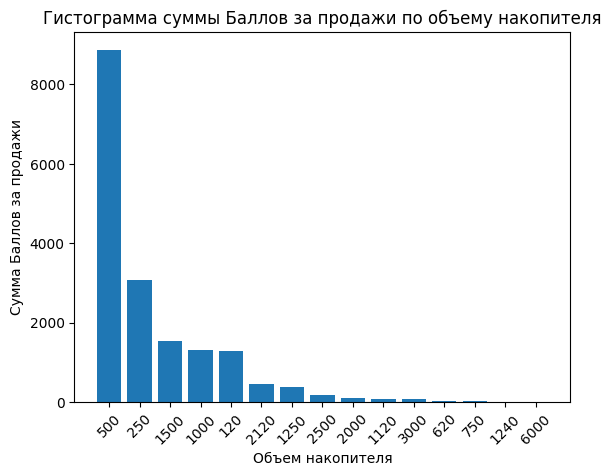

In [ ]:
plt.bar(disk_top_list.index.astype(str), disk_top_list.values)
plt.xlabel('Объем накопителя')
plt.ylabel('Сумма Баллов за продажи')
plt.title('Гистограмма суммы Баллов за продажи по объему накопителя')
plt.xticks(rotation=45)
plt.show()

Проверим также наличие корреляции с ценой. Нулевая гипотеза - отсутствие связи

In [ ]:
stats.spearmanr(df_copy['Объем накопителей'], df_copy['Цена'])

SignificanceResult(statistic=0.6039446170973053, pvalue=8.574961551186853e-80)

Отвергаем нулевую гипотезу в пользу альтернативной

# 3. Выводы и рекомендации

Минимальная цена ПК - 10805. Максимальная цена - 235 900. 75% продаются по цене ниже 84 835. 25% продаются по цене ниже 39 605. Также было проведено сравнение цен всех ПК и тех позиций, по которым уже были продажи. Средняя цена по всем представленным позициям 67 850 руб. а средняя цена среди позиций, по которым есть продажи 57 437 руб. При этом половина из всех представленных позиций имеет цену ниже 66 750, а из позиций с продажами половина имеет цену 45 140. В дальнейшем при анализе цен и факторов влияния на них, в основном будем обращаться к датафрейму df_copy, предполагая, что заказчику важней цены, по которым ПК действительно продаются. Был проведен тест Шапиро-Уилка и гипотеза о нормальности распределения цены отвергнута.

P-value меньше уровня значимости - у нас есть основания отвергнуть гипотезу о нормальности распределения продаж. Среднее количество продаж 22, 50% позиций имеющих продажи попадают в интервал "менее пяти раз" и 90% позиций попадают в интервал до 50 продаж. Только 5 позиций продавались более 800 раз.

Подтверждена статистическая значимость связи между "Ценой" и "Баллами за продажи". Значение коэффициента корреляции (-0.235) со знаком минус показывает, что связь между переменными обратная - чем выше цена, тем меньше количество продаж

Гистограмма показывает, что самое большое суммарное количество продаж имеют ПК с ценами 30-40 т.р.

Топ пять по встречаемости позиций в обоих датафреймах - Intel Core i5, Intel Core i7, Intel Core i3, AMD Ryzen 5, AMD Athlon. Наиболее часто встречаются 6-ядерные процессоры. Чуть реже - 4-ядерные.

Объединив тип процессора и количество ядер процессора мы выделели топ 16 процессоров в продаваемых ПК. Были выявлены значимые статистические различия между группами, как по цене, так и по количеству продаж. Несмотря на то, что наиболее представленным является Intel Core i5/6 , самый продаваемый AMD Ryzen 5/6 (условное количество продаж 4382). Затем следует Intel Core i5/6 (2599 продаж), Intel Core i3/4 (2563). Также были расчитаны средние цены на ПК с топ-16 процессоров. Самые высокие средние цены имеют ПК Intel Core i5/10 (117 т.р.) и Intel Core i7/12 (122 т.р.)

На рынке представлены 3 основных производителя Видеопроцессоров - NVIDIA, AMD, Intel. Различия между количеством продаж в группах разделенных по производителю Видеопроцессора статистически значимы. NVIDIA является как наиболее часто представленной, так и наиболее продаваемой в составе ПК позицией - почти у 50% имеющих продажи ПК Видеопроцессор NVIDIA. При этом самыми продаваемыми среди процессоров NVIDIA являются: NVIDIA GeForce GT 1030, NVIDIA GeForce GTX 1660, NVIDIA GeForce RTX 3050; среди Intel: Intel HD Graphics, Intel HD Graphics 610, Intel HD Graphics 2000; среди AMD: AMD Radeon Vega 7, AMD Radeon R5, AMD Radeon Vega 3. При этом важно отметить, что самая популярная модель видеопроцессора AMD Radeon Vega 7 (продана более 4000). Также были выялены статистически значимые различия в ценах на ПК в зависимости от производителя Видеопроцессора. Компьютеры с NVIDIA дороже других - болше половины из них стоит дороже 70 000. 75% компьютеров с видеопроцессором Intel дешевле 30 000, а с видеопроцессором AMD дешевле 40 000.

Два основных типа оперативной памяти DDR3 и DDR4. DDR5 встречается всего 2 раза в проданных ПК. Был применен критерий Манна-Уитни для выявления значимости различий у ПК с DDR3 и DDR4 в ценах и количестве продаж. Различия признаны значимыми. Построенные ящики с усами позволяют судить о разнице в ценах на ПК. Медианная цена на ПК с DDR3 около 24 000, а с DDR4 около 70 000. Только 25% ПК с DDR4 стоят меньше 50 000. При этом в проданных ПК гораздо чаще стоит DDR4 (почти 13600 продаж против 3700 у DDR3). Самым популярным объемом оперативной памяти является 16 Гб, затем идут 8, 32 и 4.

Выявлены статистически значимые различия между разными типами накопителей по цене и по количеству. У 72% проданных ПК установлен только SSd, почти у 25% SSD и HDD, оба диска у 3%. Средняя цена ПК с SSD 52 140, у ПК с HDD 23 400, у ПК с обоими дисками 77 310. По количеству продаж лидирует SSD (условное количество продаж 14268), затем ПК с обоими накопителями -2814, c HDD 302. Самый популярный объем накопителя - 500 Гб.